#Upload files + EDA


In [ ]:
# Install the necessary library
!pip install google-colab

# Import the library
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.1 MB/s eta 0:00:00
Mounted at /content/drive


The following 2 cells are for topic modeling install then restart kernell.

In [ ]:
!pip install -q gensim nltk spacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 41.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 42.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 50.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 48.5 MB/s eta 0:00:00


In [ ]:
# download then restart run time (dont re-run code after restart)
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
from gensim import corpora, models
from gensim.models import Phrases
from gensim.models.phrases import Phraser

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')

import spacy
spacy.cli.download("en_core_web_sm")
nlp = spacy.load("en_core_web_sm")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import pandas as pd

lululemon_df = pd.read_csv('/content/drive/MyDrive/lululemon_tweets.csv')
nike_df = pd.read_csv('/content/drive/MyDrive/nike_3k.csv')

print(lululemon_df.head())
print(nike_df.head())

                  created_at                   id  \
0  2021-10-01 11:45:57+00:00  1443905019309224000   
1  2021-10-01 11:58:05+00:00  1443908070506172400   
2  2021-10-01 09:58:19+00:00  1443877931722461200   
3  2021-10-01 14:01:03+00:00  1443939018366926800   
4  2021-10-01 13:44:13+00:00  1443934780949631000   

                                           full_text  is_quote_status  \
0  #FF @LauraMcInnes7 @lululemon @jeffieruth @col...            False   
1  @BillGarlandSpkr @LauraMcInnes7 @lululemon @je...            False   
2  RT @Mom_Junky: Leggings can be intimidating! I...            False   
3  @EMRAnswers @ShereeseMayMba @stacy_hurt @Hassa...            False   
4  @BillGarlandSpkr @LauraMcInnes7 @lululemon @je...            False   

   retweet_count  favorite_count              user.id          user.name  \
0              5              25           3006851958       Bill Garland   
1              0               9           4836304415         Coleen Lou   
2             

In [ ]:
print("Lululemon Data Shape:", lululemon_df.shape)
print("Nike Data Shape:", nike_df.shape)

Lululemon Data Shape: (6190, 15)
Nike Data Shape: (3000, 15)


In [ ]:
print(lululemon_df.info())
print(nike_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6190 entries, 0 to 6189
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   created_at            6190 non-null   object
 1   id                    6190 non-null   int64 
 2   full_text             6190 non-null   object
 3   is_quote_status       6190 non-null   bool  
 4   retweet_count         6190 non-null   int64 
 5   favorite_count        6190 non-null   int64 
 6   user.id               6190 non-null   int64 
 7   user.name             6190 non-null   object
 8   user.screen_name      6190 non-null   object
 9   user.location         4477 non-null   object
 10  user.followers_count  6190 non-null   int64 
 11  user.friends_count    6190 non-null   int64 
 12  user.listed_count     6190 non-null   int64 
 13  user.verified         6190 non-null   bool  
 14  user.statuses_count   6190 non-null   int64 
dtypes: bool(2), int64(8), object(5)
memory

#Data Cleaning + Summary


In [ ]:
!pip install emoji
!pip install langid

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 18.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langid: filename=langid-1.1.6-py3-none-any.whl size=1941171 sha256=4f807f81bd1e6692c0c02f7a6063b4a5bf113cf36a17f3b4ce7eae680319297c
  Stored in directory: /root/.cache/pip/wheels/32/6a/b6/b7eb43a6ad55b139c15c5daa29f3707659cfa6944d3c696f5b
Successfully built langid


In [ ]:
import pandas as pd
import re
import nltk
import emoji
import langid
from nltk.corpus import stopwords

nltk.download('stopwords')

# --- Custom Stopwords ---
stop_words = set(stopwords.words('english')).union({'rt', 'amp', 'im', 'lol', 'omg'})


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Utility Functions
def extract_hashtags(text):
    return re.findall(r"#(\w+)", text)

#Hashtags
def normalize_hashtags(hashtags):
    return [h.lower() for h in hashtags]

#Emojis
def extract_emojis(text):
    return [char for char in text if char in emoji.EMOJI_DATA]

#English
def is_english(text):
    try:
        lang, _ = langid.classify(text)
        return lang == 'en'
    except:
        return False

#Custom words
def is_noisy_promotional(text, hashtags):
    promo_phrases = [
        "check out", "shop my closet", "good share", "loving :", "link in bio", "buy now", "for sale",
        "resell", "poshmark", "restock", "grab now", "available now", "new drop", "on sale"
    ]
    noisy_tags = {'poshmark', 'shopmycloset', 'fashion', 'style'}
    text_lower = text.lower()
    has_promo_text = any(phrase in text_lower for phrase in promo_phrases)
    has_promo_tags = bool(set([h.lower() for h in hashtags]) & noisy_tags)
    return has_promo_text or has_promo_tags

def clean_text(text):
    text = emoji.demojize(text)
    text = text.lower()
    text = re.sub(r"http\S+|@\w+|#\w+", '', text)
    text = re.sub(r'[^a-zA-Z\s:]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    words = text.split()
    filtered_words = [w for w in words if w not in stop_words]
    return " ".join(filtered_words)

def preprocess_for_model(text):
    text = emoji.demojize(text)
    text = text.lower()
    text = re.sub(r"http\S+|@\w+|#\w+", '', text)
    text = re.sub(r'[^a-zA-Z\s:]', '', text)
    return re.sub(r'\s+', ' ', text).strip()


In [ ]:
# Standardize and Prepare Datasets
for df, brand in zip([lululemon_df, nike_df], ['Lululemon', 'Nike']):
    df.columns = df.columns.str.lower().str.strip()
    df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')
    df['brand'] = brand
    df['text'] = df.get('text') if 'text' in df else df['full_text']
    df['user.location'] = df.get('user.location', pd.Series(['Unknown'] * len(df))).fillna('Unknown')
    df['location'] = df.get('location', pd.Series(['Unknown'] * len(df))).fillna('Unknown')

In [ ]:
# Filter Out Retweets
lululemon_df = lululemon_df[~lululemon_df['text'].str.startswith('RT')]
nike_df = nike_df[~nike_df['text'].str.startswith('RT')]

# Extract Hashtags and Emojis
lululemon_df.loc[:, 'hashtags'] = lululemon_df['text'].apply(extract_hashtags)
nike_df.loc[:, 'hashtags'] = nike_df['text'].apply(extract_hashtags)

# Normalize Hashtags to Lowercase (e.g., nike, Nike, NIKE)
lululemon_df.loc[:, 'hashtags'] = lululemon_df['hashtags'].apply(normalize_hashtags)
nike_df.loc[:, 'hashtags'] = nike_df['hashtags'].apply(normalize_hashtags)

# Detect Language (Keep English Only)
lululemon_df.loc[:, 'lang'] = lululemon_df['text'].apply(is_english)
nike_df.loc[:, 'lang'] = nike_df['text'].apply(is_english)

lululemon_df = lululemon_df[lululemon_df['lang']]
nike_df = nike_df[nike_df['lang']]

# Filter Promotional/Noisy Tweets (e.g., new drop buy now poshmark)
lululemon_noise_count = lululemon_df['text'].shape[0]
lululemon_df = lululemon_df[~lululemon_df.apply(lambda row: is_noisy_promotional(row['text'], row['hashtags']), axis=1)]
lululemon_noise_count -= lululemon_df['text'].shape[0]

nike_noise_count = nike_df['text'].shape[0]
nike_df = nike_df[~nike_df.apply(lambda row: is_noisy_promotional(row['text'], row['hashtags']), axis=1)]
nike_noise_count -= nike_df['text'].shape[0]

In [ ]:
# Apply Text Cleaning
lululemon_df['clean_text'] = lululemon_df['text'].astype(str).apply(clean_text)
nike_df['clean_text'] = nike_df['text'].astype(str).apply(clean_text)

lululemon_df['preprocessed_text'] = lululemon_df['text'].astype(str).apply(preprocess_for_model)
nike_df['preprocessed_text'] = nike_df['text'].astype(str).apply(preprocess_for_model)

# Drop Empty Cleaned Text Rows
lululemon_df = lululemon_df[lululemon_df['clean_text'].str.strip() != '']
nike_df = nike_df[nike_df['clean_text'].str.strip() != '']

# Remove user 'kinseyfit' (promotion user)
lululemon_df = lululemon_df[lululemon_df['user.screen_name'].str.lower() != 'kinseyfit']

# Save for Reuse
lululemon_df.to_csv('lululemon_cleaned_final.csv', index=False)
nike_df.to_csv('nike_cleaned_final.csv', index=False)

# Confirm Output
print(f"Lululemon cleaned rows: {len(lululemon_df)} (Removed {lululemon_noise_count} noisy tweets)")
print(f"Nike cleaned rows: {len(nike_df)} (Removed {nike_noise_count} noisy tweets)")
print("Columns after prep:", lululemon_df.columns.tolist())
print("Columns after prep:", nike_df.columns.tolist())



Lululemon cleaned rows: 3728 (Removed 72 noisy tweets)
Nike cleaned rows: 682 (Removed 2050 noisy tweets)
Columns after prep: ['created_at', 'id', 'full_text', 'is_quote_status', 'retweet_count', 'favorite_count', 'user.id', 'user.name', 'user.screen_name', 'user.location', 'user.followers_count', 'user.friends_count', 'user.listed_count', 'user.verified', 'user.statuses_count', 'brand', 'text', 'location', 'hashtags', 'lang', 'clean_text', 'preprocessed_text']
Columns after prep: ['author_id', 'statuses_count', 'location', 'verified', 'followers_count', 'friends_count', 'listed_count', 'favourites_count', 'tweet_id', 'text', 'created_at', 'lang', 'retweet_count', 'hashtags', 'favorite_count', 'brand', 'user.location', 'clean_text', 'preprocessed_text']


##Further exploration and comparisions

getting insights on the dataset and further refining it. This section is purely for investigations and extracting quantitative insights

In [ ]:
# Function to summarize each dataset
def summarize_dataset(df, brand):
    print(f"\n--- {brand} Data Summary ---\n")

    # Missing values
    print("Missing values:\n", df.isnull().sum())

    # Date range
    print("\nDate range:")
    print("Start:", df['created_at'].min())
    print("End:", df['created_at'].max())

    # Basic stats (numerical columns only)
    print("\nBasic statistics:\n", df.describe())

# Run summary for each dataset
summarize_dataset(lululemon_df, "Lululemon")
summarize_dataset(nike_df, "Nike")



--- Lululemon Data Summary ---

Missing values:
 created_at              0
id                      0
full_text               0
is_quote_status         0
retweet_count           0
favorite_count          0
user.id                 0
user.name               0
user.screen_name        0
user.location           0
user.followers_count    0
user.friends_count      0
user.listed_count       0
user.verified           0
user.statuses_count     0
brand                   0
text                    0
location                0
hashtags                0
lang                    0
clean_text              0
preprocessed_text       0
dtype: int64

Date range:
Start: 2021-10-01 11:58:05+00:00
End: 2022-01-01 04:15:17+00:00

Basic statistics:
                  id  retweet_count  favorite_count       user.id  \
count  3.728000e+03    3728.000000     3728.000000  3.728000e+03   
mean   1.460718e+18       0.226663        3.320815  1.260662e+17   
std    9.854556e+15       1.850131       27.255975  3.528152e+17

In [ ]:
from datetime import timedelta

def compute_metrics(df, brand_name):
    # Calculate tweet period
    start_date = df['created_at'].min()
    end_date = df['created_at'].max()
    num_days = (end_date - start_date).days or 1  # prevent division by zero

    # Tweet count and engagement
    total_tweets = len(df)
    df['engagement'] = df['retweet_count'] + df['favorite_count']
    avg_engagement_per_tweet = df['engagement'].mean()
    avg_tweets_per_day = total_tweets / num_days

    # Print summary
    print(f"\n {brand_name} Summary:")
    print(f"Date Range: {start_date.date()} to {end_date.date()} ({num_days} days)")
    print(f"Total Tweets: {total_tweets}")
    print(f"Average Tweets per Day: {avg_tweets_per_day:.2f}")
    print(f"Average Engagement per Tweet: {avg_engagement_per_tweet:.2f}")

    return {
        'brand': brand_name,
        'avg_tweets_per_day': avg_tweets_per_day,
        'avg_engagement_per_tweet': avg_engagement_per_tweet
    }

# Run metrics
lululemon_metrics = compute_metrics(lululemon_df, "Lululemon")
nike_metrics = compute_metrics(nike_df, "Nike")



 Lululemon Summary:
Date Range: 2021-10-01 to 2022-01-01 (91 days)
Total Tweets: 3728
Average Tweets per Day: 40.97
Average Engagement per Tweet: 3.55

 Nike Summary:
Date Range: 2023-02-23 to 2023-03-03 (7 days)
Total Tweets: 682
Average Tweets per Day: 97.43
Average Engagement per Tweet: 7.00


dealt with very short tweets only during Topic modeling to improve coherence and ensure that extracted topics are based on semantically rich content.Removing them earlier might lose some context in terms of emotional signals, impactful keywords, trending hashtags, or influential user interactions.

In [ ]:
lululemon_df['clean_text_length'] = lululemon_df['clean_text'].apply(lambda x: len(x.split()))
print("Very short cleaned tweets (≤3 words):", sum(lululemon_df['clean_text_length'] <= 3))


Very short cleaned tweets (≤3 words): 524


In [ ]:
nike_df['clean_text_length'] = nike_df['clean_text'].apply(lambda x: len(x.split()))
print("Very short cleaned tweets (≤3 words):", sum(nike_df['clean_text_length'] <= 3))

Very short cleaned tweets (≤3 words): 74


In [ ]:
# comparing between top words before and after cleaning (lululemon)
from collections import Counter

def top_words(column, n=20):
    all_words = " ".join(column).split()
    return Counter(all_words).most_common(n)

print("Raw Top Words:", top_words(lululemon_df['text']))
print("Cleaned Top Words:", top_words(lululemon_df['clean_text']))


Raw Top Words: [('@lululemon', 3487), ('to', 2141), ('the', 2029), ('a', 1521), ('and', 1486), ('I', 1457), ('for', 1199), ('in', 1011), ('you', 947), ('is', 839), ('of', 819), ('my', 643), ('on', 642), ('your', 627), ('with', 511), ('are', 479), ('this', 471), ('that', 470), ('it', 459), ('&', 391)]
Cleaned Top Words: [('get', 282), ('coal', 244), ('discount', 231), ('dont', 228), ('like', 227), ('pants', 224), ('order', 180), ('would', 177), ('go', 173), ('renewable', 152), ('customer', 150), ('one', 150), ('take', 150), ('please', 148), ('got', 146), ('leggings', 143), ('service', 140), ('new', 139), ('day', 138), ('want', 134)]


In [ ]:
# comparing between top words before and after cleaning (nike)
def top_words(column, n=20):
    all_words = " ".join(column).split()
    return Counter(all_words).most_common(n)

print("Raw Top Words:", top_words(nike_df['text']))
print("Cleaned Top Words:", top_words(nike_df['clean_text']))

Raw Top Words: [('#Nike', 352), ('#nike', 288), ('the', 278), ('Nike', 166), ('to', 148), ('a', 145), ('and', 142), ('of', 138), ('for', 115), ('on', 110), ('in', 109), ('Air', 95), ('I', 85), ('with', 63), ('is', 62), ('1', 61), ('my', 61), ('you', 55), ('this', 52), ('-', 52)]
Cleaned Top Words: [('nike', 187), ('air', 107), ('low', 59), ('x', 52), ('black', 50), ('white', 48), ('dunk', 45), ('gt', 43), ('max', 42), ('jordan', 41), ('blue', 39), ('day', 36), ('shoes', 35), ('mens', 35), ('size', 33), ('available', 32), ('one', 31), ('retro', 27), ('get', 27), ('new', 26)]


In [ ]:
nike_df['clean_text'].value_counts().head(20)

clean_text
nike club mens training joggers black xlarge link: price: discount:                                                                                                     11
mailing list gt instagram gt deadlaced website gt daily deals page gt deals website gt                                                                                   6
size ds deep royal sb dunk                                                                                                                                               4
mid ice blue black sail white                                                                                                                                            4
appreciate support coffee encourages find gift idea                                                                                                                      4
air flight air zoom                                                                                                                                                      4
shoes white medium royal blue dh mens                                                                                                                                    4
usa store only: gold standard whey protein powder                                                                                                                        4
air retro military black white                                                                                                                                           4
tb promo white black dm mens multi size                                                                                                                                  4
nike kyrie infinity world people sweet beet cz                                                                                                                           4
low retro white gum royal blue                                                                                                                                           4
low bq                                                                                                                                                                   4
usa store only: gatorade whey protein                                                                                                                                    4
nike air rubber dunk x offwhite green strike cu mens size                                                                                                                4
x moet final air force                                                                                                                                                   4
low white cw                                                                                                                                                             4
x low premium special box                                                                                                                                                4
windbreaker men size l blue nwt fully zipped                                                                                                                             3
dunk low lx pink foamn dunk low medium olive dunk low spartan air max tiffany blazers black friday tiffany co court vision dunks dunks low dunks high dunk low panda     3
Name: count, dtype: int64

In [ ]:
# Top Haashtags & Emojis (lululemon)
from collections import Counter
from itertools import chain

hashtags = Counter(chain.from_iterable(lululemon_df['hashtags']))
print("Top Hashtags:", hashtags.most_common(10))

# Extract emojis from 'text' column using the 'extract_emojis' function
lululemon_df['emojis'] = lululemon_df['text'].apply(extract_emojis)

emojis = Counter(chain.from_iterable(lululemon_df['emojis']))
print("Top Emojis:", emojis.most_common(10))

Top Hashtags: [('thesweatlife', 87), ('lululemoncoalprit', 71), ('fossilfreefashion', 64), ('coalsweats', 61), ('lululemon', 38), ('yoga', 16), ('lululemonathletica', 11), ('teamcanada', 10), ('lululemonambassador', 8), ('12daysofcheckout', 8)]
Top Emojis: [('😂', 96), ('😭', 74), ('🔥', 47), ('🏻', 39), ('🤣', 37), ('♀', 33), ('🏼', 32), ('😩', 31), ('😍', 28), ('👏', 28)]


In [ ]:
# Top Haashtags & Emojis (Nike)
hashtags = Counter(chain.from_iterable(nike_df['hashtags']))
print("Top Hashtags:", hashtags.most_common(10))

# Extract emojis from 'text' column using the 'extract_emojis' function
nike_df['emojis'] = nike_df['text'].apply(extract_emojis)

emojis = Counter(chain.from_iterable(nike_df['emojis']))
print("Top Emojis:", emojis.most_common(10))

Top Hashtags: [('nike', 720), ('sneakers', 58), ('sneakerhead', 52), ('jordan', 49), ('kotd', 42), ('snkrs', 40), ('nba', 33), ('football', 33), ('fitness', 31), ('adidas', 31)]
Top Emojis: [('🔥', 30), ('🔗', 14), ('👟', 12), ('😍', 10), ('😂', 10), ('🏀', 9), ('➡', 8), ('🏼', 8), ('💙', 6), ('🤣', 6)]


In [ ]:
# Count of unique users for each brand
print("Unique Lululemon users:", lululemon_df['user.screen_name'].nunique())
print("Unique Nike users:", nike_df['author_id'].nunique())

Unique Lululemon users: 2863
Unique Nike users: 334


#Sentiment, Emotion, & Engagement Analysis

##Sentiment Analysis using VADER


In [ ]:
# Install NLTK + VADER
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
# Sentiment Function
def apply_vader_sentiment(df, text_column='clean_text'):
    df = df.copy()
    df['sentiment_score'] = df[text_column].astype(str).apply(lambda x: sia.polarity_scores(x)['compound'])
    df['sentiment_label'] = df['sentiment_score'].apply(
        lambda score: 'positive' if score > 0.05 else ('negative' if score < -0.05 else 'neutral')
    )
    return df

# Apply Sentiment Analysis
lululemon_df = apply_vader_sentiment(lululemon_df)
nike_df = apply_vader_sentiment(nike_df)


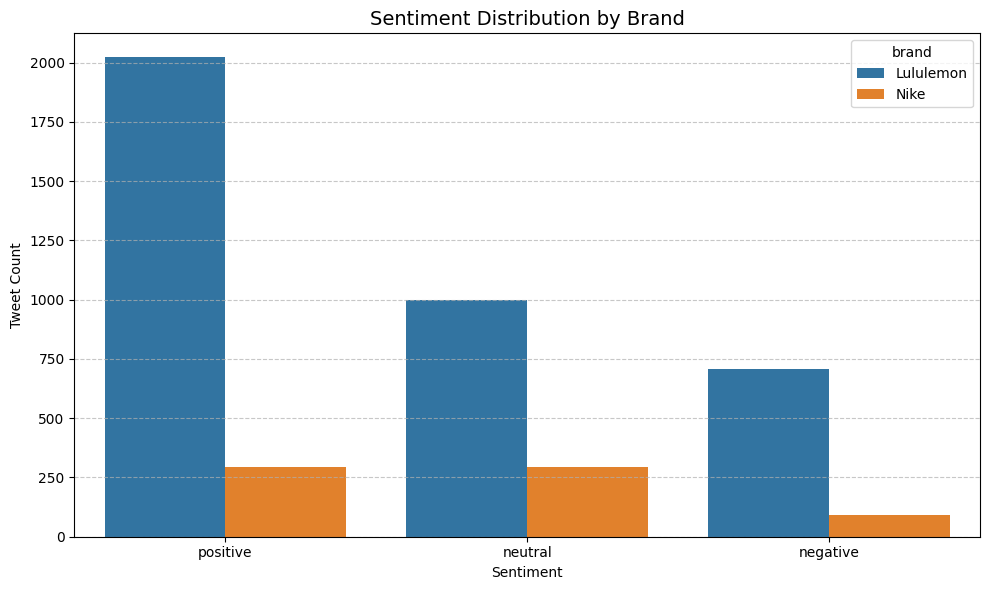

In [ ]:
# --- Combine for Comparison ---
combined_sentiment_df = pd.concat([
    lululemon_df[['brand', 'sentiment_label']],
    nike_df[['brand', 'sentiment_label']]
])
# Import seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# --- Plot Sentiment Count ---
plt.figure(figsize=(10, 6))
sns.countplot(data=combined_sentiment_df, x='sentiment_label', hue='brand', order=['positive', 'neutral', 'negative'])
plt.title("Sentiment Distribution by Brand", fontsize=14)
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
# --- Average Sentiment Score ---
avg_sentiment = pd.concat([
    lululemon_df[['sentiment_score']].assign(brand='Lululemon'),
    nike_df[['sentiment_score']].assign(brand='Nike')
])

print("🔍 Average Sentiment Score per Brand:")
print(avg_sentiment.groupby('brand').mean().round(3))

🔍 Average Sentiment Score per Brand:
           sentiment_score
brand                     
Lululemon            0.223
Nike                 0.174


##Emotion classification using roberta-base-emotion

"What do people feel?" (Volume of emotion). Adding an emotional layer to the sentiment analysis, for better accuracy and relaiability.

In [ ]:
from transformers import pipeline
from tqdm import tqdm

# Load model with all emotion probabilities
emotion_pipeline = pipeline(
    "text-classification",
    model="cardiffnlp/twitter-roberta-base-emotion",
    top_k=None,  # return all emotion scores, not just top-1
    truncation=True,
    max_length=128
)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/768 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

Device set to use cpu


In [ ]:
# Chunked classification with top emotion + confidence score
def classify_emotions_in_chunks(df, text_column, chunk_size=1000, batch_size=32):
    texts = df[text_column].astype(str).tolist()
    top_emotions = []
    top_scores = []

    for i in tqdm(range(0, len(texts), chunk_size), desc=" Classifying tweets"):
        batch = texts[i:i + chunk_size]
        results = emotion_pipeline(batch, batch_size=batch_size)

        for res in results:
            top = max(res, key=lambda x: x['score'])  # most confident emotion
            top_emotions.append(top['label'])
            top_scores.append(top['score'])

    return top_emotions, top_scores


In [ ]:
# Apply to both datasets
lululemon_emotions, lululemon_scores = classify_emotions_in_chunks(lululemon_df, 'clean_text')
nike_emotions, nike_scores = classify_emotions_in_chunks(nike_df, 'clean_text')

# Assign results
lululemon_df['roberta_emotion'] = lululemon_emotions
lululemon_df['roberta_emotion_score'] = lululemon_scores

nike_df['roberta_emotion'] = nike_emotions
nike_df['roberta_emotion_score'] = nike_scores


 Classifying tweets: 100%|██████████| 1/1 [01:20<00:00, 80.38s/it]


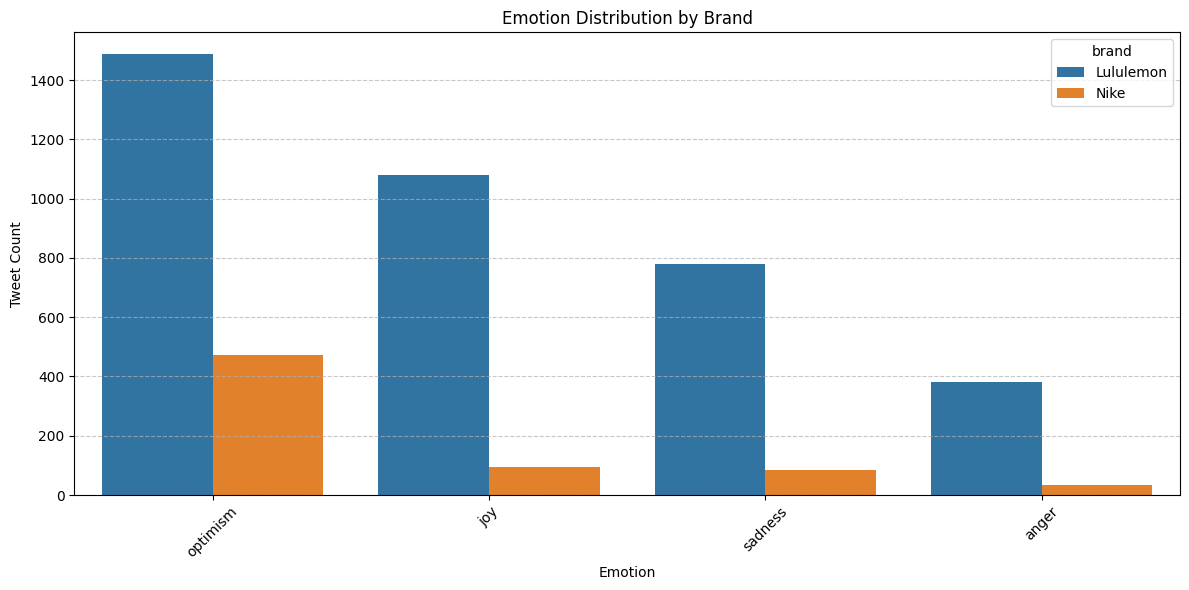

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combine datasets
emotion_df = pd.concat([
    lululemon_df[['roberta_emotion']].assign(brand='Lululemon'),
    nike_df[['roberta_emotion']].assign(brand='Nike')
])

# Plot emotion distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=emotion_df, x='roberta_emotion', hue='brand', order=emotion_df['roberta_emotion'].value_counts().index)
plt.title("Emotion Distribution by Brand")
plt.xlabel("Emotion")
plt.ylabel("Tweet Count")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# uncomment if error occurs
# lululemon_df['engagement'] = lululemon_df['retweet_count'] + lululemon_df['favorite_count']
# nike_df['engagement'] = nike_df['retweet_count'] + nike_df['favorite_count']

# Calculate average engagement per emotion for Lululemon
lululemon_emotion_engagement = (
    lululemon_df.groupby('roberta_emotion')['engagement']
    .mean()
    .reset_index()
    .rename(columns={'engagement': 'avg_engagement'})
)
lululemon_emotion_engagement['brand'] = 'Lululemon'

# Calculate average engagement per emotion for Nike
nike_emotion_engagement = (
    nike_df.groupby('roberta_emotion')['engagement']
    .mean()
    .reset_index()
    .rename(columns={'engagement': 'avg_engagement'})
)
nike_emotion_engagement['brand'] = 'Nike'

# Combine results
emotion_engagement_summary = pd.concat([lululemon_emotion_engagement, nike_emotion_engagement])

# Sort and display
emotion_engagement_summary = emotion_engagement_summary.sort_values(by=['brand', 'avg_engagement'], ascending=[True, False])
emotion_engagement_summary.reset_index(drop=True, inplace=True)

# Display as table
emotion_engagement_summary


roberta_emotion  avg_engagement      brand
0        optimism        4.330195  Lululemon
1             joy        4.185939  Lululemon
2         sadness        2.236504  Lululemon
3           anger        1.363874  Lululemon
4         sadness       10.975904       Nike
5           anger        7.424242       Nike
6        optimism        7.103594       Nike
7             joy        2.763441       Nike

In [ ]:
# Lululemon emotion count
lululemon_emotion_counts = lululemon_df['roberta_emotion'].value_counts().reset_index()
lululemon_emotion_counts.columns = ['emotion', 'count']
lululemon_emotion_counts['brand'] = 'Lululemon'

# Nike emotion count
nike_emotion_counts = nike_df['roberta_emotion'].value_counts().reset_index()
nike_emotion_counts.columns = ['emotion', 'count']
nike_emotion_counts['brand'] = 'Nike'

# Combine
emotion_distribution = pd.concat([lululemon_emotion_counts, nike_emotion_counts], ignore_index=True)

# Optional: sort for readability
emotion_distribution = emotion_distribution.sort_values(by=['brand', 'emotion']).reset_index(drop=True)

# Show final result
emotion_distribution


emotion  count      brand
0     anger    382  Lululemon
1       joy   1081  Lululemon
2  optimism   1487  Lululemon
3   sadness    778  Lululemon
4     anger     33       Nike
5       joy     93       Nike
6  optimism    473       Nike
7   sadness     83       Nike

In [ ]:
# Parameters
TARGET_EMOTIONS = ['joy', 'anger', 'sadness']
TOP_N = 2  # Number of top tweets per emotion

# Combine both brands for a broader search
combined_df = pd.concat([lululemon_df, nike_df], ignore_index=True)

# Ensure engagement column exists
combined_df['engagement'] = combined_df['retweet_count'] + combined_df['favorite_count']

# Extract top tweets for each emotion
outlier_quotes = []

for emotion in TARGET_EMOTIONS:
    top_tweets = combined_df[combined_df['roberta_emotion'] == emotion].sort_values(by='engagement', ascending=False).head(TOP_N)

    for _, row in top_tweets.iterrows():
        quote = {
            'brand': row.get('brand', 'Unknown'),
            'emotion': row['roberta_emotion'],
            'engagement': int(row['engagement']),
            'text': row['text']
        }
        outlier_quotes.append(quote)

# Convert to DataFrame for easy viewing
pd.DataFrame(outlier_quotes)


brand  emotion  engagement  \
0  Lululemon      joy        1106   
1  Lululemon      joy         360   
2       Nike    anger         141   
3       Nike    anger          33   
4  Lululemon  sadness         417   
5       Nike  sadness         354   

                                                text  
0  Irony: I just left @lululemon where their empl...  
1  I just want to know how #HenryCavill isn’t the...  
2  Military Blue 4\nBack and better than ever (ha...  
3  DAY 26. The mark I’ll leave in the world is sh...  
4  Two of us did a five mile @lululemon sponsored...  
5  Day 23 When I started “hoarding” shoes there w...

##Emotion Vs Engagement
"What gets people talking?" (Impact of emotion)

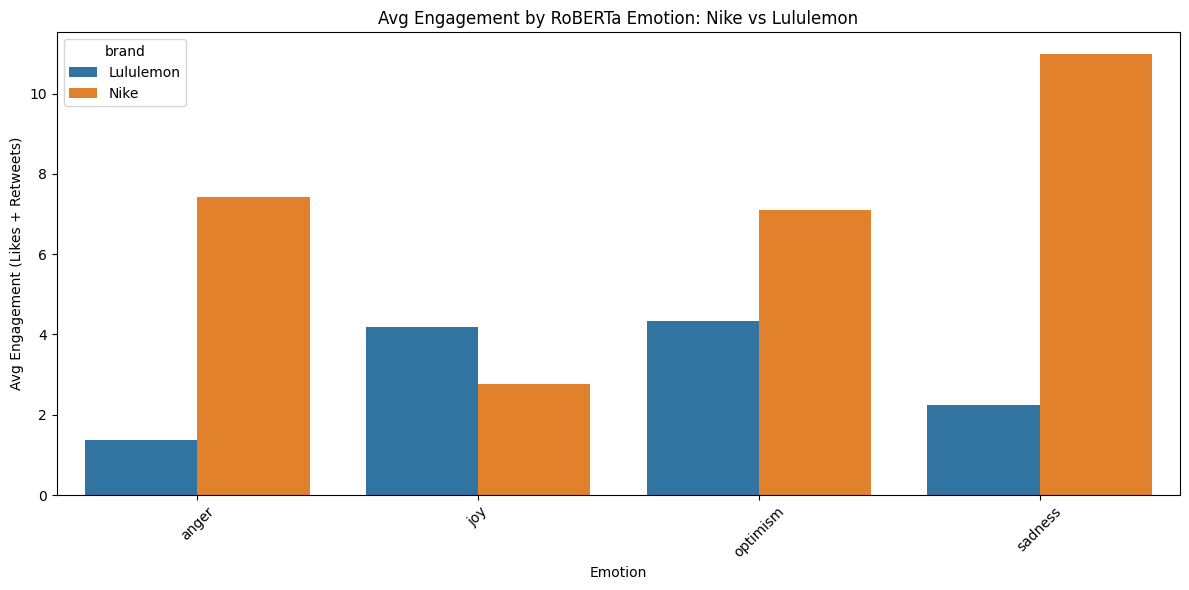

In [ ]:
# uncomment if error occurs
# lululemon_df['engagement'] = lululemon_df['retweet_count'] + lululemon_df['favorite_count']
# nike_df['engagement'] = nike_df['retweet_count'] + nike_df['favorite_count']

#group by RoBERTa emotion
# Combine for analysis
combined_df = pd.concat([
    lululemon_df[['roberta_emotion', 'engagement', 'brand']],
    nike_df[['roberta_emotion', 'engagement', 'brand']]
])
engagement_by_emotion = combined_df.groupby(['brand', 'roberta_emotion'])['engagement'].mean().reset_index()

# Plot it
plt.figure(figsize=(12, 6))
sns.barplot(data=engagement_by_emotion, x='roberta_emotion', y='engagement', hue='brand')
plt.title('Avg Engagement by RoBERTa Emotion: Nike vs Lululemon')
plt.xlabel('Emotion')
plt.ylabel('Avg Engagement (Likes + Retweets)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##Investigations & quantitative measures

In [ ]:
from IPython.display import display

# Combine emotion labels from both datasets (just to loop through all unique emotions)
roberta_emotion_df = pd.concat([
    lululemon_df[['roberta_emotion']].assign(brand='Lululemon'),
    nike_df[['roberta_emotion']].assign(brand='Nike')
])

# Loop through unique emotions and display 5 tweets per brand
for emotion in roberta_emotion_df['roberta_emotion'].unique():
    print(f"\n Sample tweets for emotion: **{emotion.upper()}**")

    # Filter each brand for current emotion
    lululemon_emotion_df = lululemon_df[lululemon_df['roberta_emotion'] == emotion]
    nike_emotion_df = nike_df[nike_df['roberta_emotion'] == emotion]

    # --- Lululemon ---
    if not lululemon_emotion_df.empty:
        lululemon_sample = lululemon_emotion_df.sample(
            n=min(5, len(lululemon_emotion_df)),
            random_state=42,
            replace=len(lululemon_emotion_df) < 5
        )
        print(" Lululemon Sample:")
        display(lululemon_sample[['text', 'clean_text', 'roberta_emotion', 'sentiment_label', 'sentiment_score']])
    else:
        print(" No Lululemon tweets found for this emotion.")

    # --- Nike ---
    if not nike_emotion_df.empty:
        nike_sample = nike_emotion_df.sample(
            n=min(5, len(nike_emotion_df)),
            random_state=42,
            replace=len(nike_emotion_df) < 5
        )
        print(" Nike Sample:")
        display(nike_sample[['text', 'clean_text', 'roberta_emotion', 'sentiment_label', 'sentiment_score']])
    else:
        print(" No Nike tweets found for this emotion.")



 Sample tweets for emotion: **OPTIMISM**
 Lululemon Sample:


text  \
5465  @dnalice @lululemon Maybe try visiting the sto...   
6104  I was scrolling through @lululemon and got fre...   
1862  @hockeynight @TeamCanada @lululemon Honestly t...   
2387      @DeezeFi @lululemon thank u Lulu much protect   
1846  @Killernewf74 @amosainger @hockeynight @TeamCa...   

                                             clean_text roberta_emotion  \
5465           maybe try visiting store princeton pants        optimism   
6104  scrolling got freaked thought simulation:faces...        optimism   
1862  honestly thought joke scrolling :facewithtears...        optimism   
2387                          thank u lulu much protect        optimism   
1846                                watched guys lately        optimism   

     sentiment_label  sentiment_score  
5465         neutral           0.0000  
6104        positive           0.0772  
1862        positive           0.6369  
2387        positive           0.6249  
1846         neutral           0.0000

 Nike Sample:


text  \
364   Give an Amazon gift card to someone you care a...   
489   Story of my life. Thx #Nike https://t.co/XdGKz...   
205   Now available on #Nike US.\nNike Air Presto.\n...   
2379  Ultra Game NBA Los Angeles Lakers Mens Woven B...   
1669  Gym or home, workout anywhere, anytime, anyone...   

                                             clean_text roberta_emotion  \
364   give amazon gift card someone care get chance ...        optimism   
489                                      story life thx        optimism   
205              available us nike air presto :link: ad        optimism   
2379  ultra game nba los angeles lakers mens woven b...        optimism   
1669           gym home workout anywhere anytime anyone        optimism   

     sentiment_label  sentiment_score  
364         positive           0.9565  
489         positive           0.3612  
205          neutral           0.0000  
2379         neutral           0.0000  
1669         neutral           0.0000


 Sample tweets for emotion: **ANGER**
 Lululemon Sample:


text  \
5788  .@lululemon, on this Boxing Day, I’m sharing y...   
5155      @2kaRask @lululemon I respect the consistency   
4276  @BudgetCommander @lululemon Seriously though a...   
5872  .@lululemon, on this Boxing Day, I’m sharing y...   
765   @poke_m0m @lululemon We have until next wednes...   

                                             clean_text roberta_emotion  \
5788  boxing day sharing youth activists wishlist ur...           anger   
5155                                respect consistency           anger   
4276  seriously though runner martial artist goalexc...           anger   
5872  boxing day sharing youth activists wishlist ur...           anger   
765                    next wednesday theres still time           anger   

     sentiment_label  sentiment_score  
5788        positive           0.6124  
5155        positive           0.4767  
4276        negative          -0.1779  
5872        positive           0.6124  
765          neutral           0.0000

 Nike Sample:


text  \
2791  @GlennYoungkin Lets close @Walmart, @target th...   
1350  #Nike #AirJordan Stay Loyal Men’s White Black ...   
2560  I hope @nike @Jumpman23 see that men are the r...   
1646  Branding Beyond Logos: A Look at Big Brand Exp...   
1001  https://t.co/iw8BEMyV9R #NIKE Structured Lifti...   

                                             clean_text roberta_emotion  \
2791  lets close mostly chinese made ban merchandise...           anger   
1350                    stay loyal mens white black red           anger   
2560  hope see men real sneaker consumer fire exclus...           anger   
1646  branding beyond logos: look big brand experiences           anger   
1001         structured lifting training weight lifting           anger   

     sentiment_label  sentiment_score  
2791        negative          -0.1779  
1350        positive           0.4767  
2560        positive           0.6249  
1646         neutral           0.0000  
1001         neutral           0.0000


 Sample tweets for emotion: **JOY**
 Lululemon Sample:


text  \
2836  Hello @lululemon can I talk to someone at cust...   
3399  @lululemon  please help address this. I usuall...   
4404  @_dawnmontgomery @lululemon I'm ain't saying n...   
3618  @NicholasFerroni @lululemon Even Osh knows the...   
6057  Urge @lululemon to take a compassionate stance...   

                                             clean_text roberta_emotion  \
2836                hello talk someone customer service             joy   
3399  please help address usually love inclusive att...             joy   
4404             aint saying nothing :faceblowingakiss:             joy   
3618             even osh knows teachers deserve better             joy   
6057  urge take compassionate stance birds banning d...             joy   

     sentiment_label  sentiment_score  
2836         neutral           0.0000  
3399        positive           0.7779  
4404         neutral           0.0000  
3618        positive           0.4404  
6057        positive           0.4939

 Nike Sample:


text  \
1481          @non_human937 anything! just do it! #nike   
793   #NBA #Nike #LeBron Value $$$ more than human r...   
1930  Make it make sense @nikestore @Nike @nikebaske...   
2356  Never be a victim to your circumstances.\n.\n....   
83    @Nike BOYCOTT #Nike #Mlb Jerseys. This is the ...   

                                             clean_text roberta_emotion  \
1481                                           anything             joy   
793   value human rights say youre equality human ri...             joy   
1930  make make sense second time month last time go...             joy   
2356                         never victim circumstances             joy   
83    boycott jerseys worst decision made almost bad...             joy   

     sentiment_label  sentiment_score  
1481         neutral           0.0000  
793         positive           0.1779  
1930        negative          -0.3182  
2356        positive           0.2057  
83          negative          -0.9387


 Sample tweets for emotion: **SADNESS**
 Lululemon Sample:


text  \
4729  @lululemon Why can’t I get your Healthcare wor...   
4677  @JoeHolder_ @lululemon @getthemirror @fittinsi...   
4414  @PaulDPoirier wouldn’t you like to send me a @...   
5144  I think the elves need a break more than you n...   
3832  @lululemon I have an order that was supposed t...   

                                             clean_text roberta_emotion  \
4729  cant get healthcare worker discount pa hold me...         sadness   
4677          workout home gold rush proving gift curse         sadness   
4414  wouldnt like send jacket :foldedhandsmediumlig...         sadness   
5144  think elves need break need santas sweatshop a...         sadness   
3832  order supposed arrive th appears stuck shippin...         sadness   

     sentiment_label  sentiment_score  
4729        positive           0.4019  
4677        negative          -0.1531  
4414        negative          -0.2755  
5144        negative          -0.1027  
3832        positive           0.4019

 Nike Sample:


text  \
995  15 Tips to Prevent Blisters from Soccer Cleats...   
45   I really need help arranging this mountain of ...   
706  I caved and purchased the Khaled Jordan’s 😩\n\...   
999  How to Prevent Blisters from Football Cleats?\...   
610  Nike Jordan II Just Don\n@eBay\n\nhttps://t.co...   

                                            clean_text roberta_emotion  \
995                tips prevent blisters soccer cleats         sadness   
45   really need help arranging mountain bags close...         sadness   
706         caved purchased khaled jordans :wearyface:         sadness   
999                   prevent blisters football cleats         sadness   
610                                     nike jordan ii         sadness   

    sentiment_label  sentiment_score  
995         neutral           0.0258  
45         positive           0.4549  
706         neutral           0.0000  
999         neutral           0.0258  
610         neutral           0.0000

In [ ]:
roberta_emotion_df['roberta_emotion'].value_counts(normalize=True)


roberta_emotion
optimism    0.444444
joy         0.266213
sadness     0.195238
anger       0.094104
Name: proportion, dtype: float64

In [ ]:
pd.crosstab(nike_df['roberta_emotion'], nike_df['sentiment_label'])  # For Nike

sentiment_label  negative  neutral  positive
roberta_emotion                             
anger                   2        9        22
joy                    33       26        34
optimism               34      224       215
sadness                24       35        24

In [ ]:
pd.crosstab(lululemon_df['roberta_emotion'], lululemon_df['sentiment_label'])  # For Lululemon

sentiment_label  negative  neutral  positive
roberta_emotion                             
anger                  11       63       308
joy                   434      266       381
optimism               60      414      1013
sadness               202      256       320

(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0, 0.5, 'anger'),
  Text(0, 1.5, 'joy'),
  Text(0, 2.5, 'optimism'),
  Text(0, 3.5, 'sadness')])

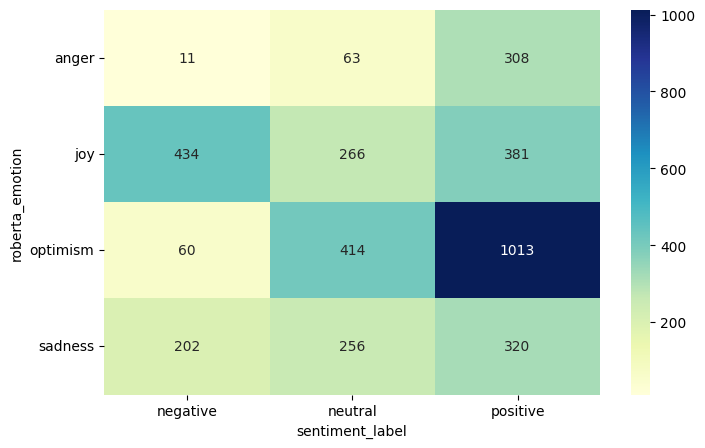

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

pivot = lululemon_df.pivot_table(index='roberta_emotion', columns='sentiment_label', aggfunc='size', fill_value=0)
plt.figure(figsize=(8, 5))
sns.heatmap(pivot, annot=True, fmt='.0f', cmap='YlGnBu')
plt.xticks(rotation=0)
plt.yticks(rotation=0)



(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0, 0.5, 'anger'),
  Text(0, 1.5, 'joy'),
  Text(0, 2.5, 'optimism'),
  Text(0, 3.5, 'sadness')])

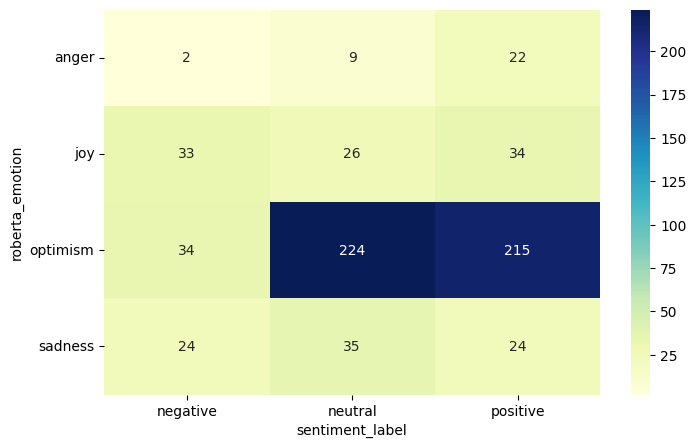

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

pivot = nike_df.pivot_table(index='roberta_emotion', columns='sentiment_label', aggfunc='size', fill_value=0)
plt.figure(figsize=(8, 5))
sns.heatmap(pivot, annot=True, fmt='.0f', cmap='YlGnBu')
plt.xticks(rotation=0)
plt.yticks(rotation=0)



In [ ]:
def label_conflict(row):
    if row['roberta_emotion'] in ['anger', 'sadness'] and row['sentiment_label'] == 'positive':
        return 'possible sarcasm'
    return 'aligned'

lululemon_df['conflict_flag'] = lululemon_df.apply(label_conflict, axis=1)
nike_df['conflict_flag'] = nike_df.apply(label_conflict, axis=1)


In [ ]:
# Quick check of sarcasm rates
print("Lululemon sarcasm-like tweets:", lululemon_df['conflict_flag'].value_counts())
print("Nike sarcasm-like tweets:", nike_df['conflict_flag'].value_counts())


Lululemon sarcasm-like tweets: conflict_flag
aligned             3100
possible sarcasm     628
Name: count, dtype: int64
Nike sarcasm-like tweets: conflict_flag
aligned             636
possible sarcasm     46
Name: count, dtype: int64


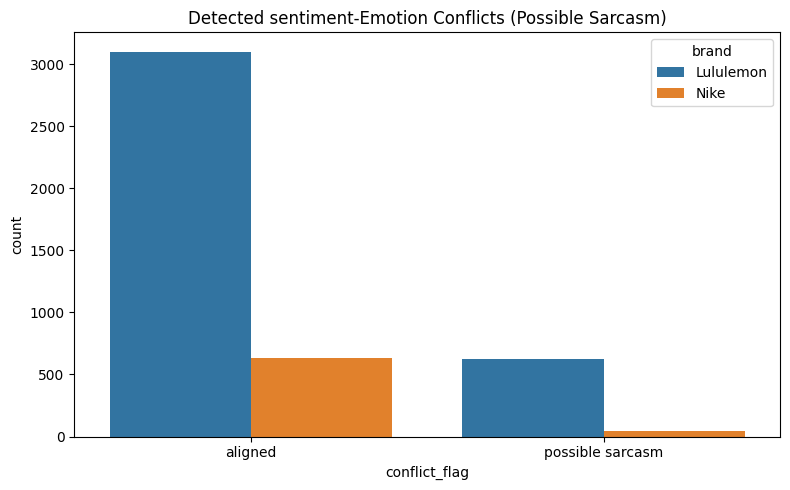

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

combined_conflict = pd.concat([
    lululemon_df[['conflict_flag']].assign(brand='Lululemon'),
    nike_df[['conflict_flag']].assign(brand='Nike')
])

plt.figure(figsize=(8, 5))
sns.countplot(data=combined_conflict, x='conflict_flag', hue='brand')
plt.title("Detected sentiment-Emotion Conflicts (Possible Sarcasm)")
plt.tight_layout()
plt.show()


##(Vader & roberta) Hybrid Model
after doing some investigations, some tweets where miss classified by either the sentiment or the emotion analysis, therefore a hybrid model tried to metigate the effect of these missclasifications by re-classifying tweets.


In [ ]:
# Define hybrid function

def hybrid_sentiment(row):
    emotion = row['roberta_emotion']
    sentiment = row['sentiment_label']

    # Strong agreement: clearly positive
    if emotion in ['joy', 'optimism'] and sentiment == 'positive':
        return 'positive'

    # Strong agreement: clearly negative
    if emotion in ['anger', 'sadness'] and sentiment == 'negative':
        return 'negative'

    # Emotionally negative, even if VADER says otherwise
    if emotion in ['anger', 'sadness'] and sentiment != 'negative':
        return 'negative'

    # Emotionally positive, but VADER disagrees → soften to neutral
    if emotion in ['joy', 'optimism'] and sentiment == 'negative':
        return 'neutral'

    # Anything else (mixed signals or low-confidence)
    return 'neutral'

# Apply to both DataFrames
lululemon_df['final_sentiment_label'] = lululemon_df.apply(hybrid_sentiment, axis=1)
nike_df['final_sentiment_label'] = nike_df.apply(hybrid_sentiment, axis=1)


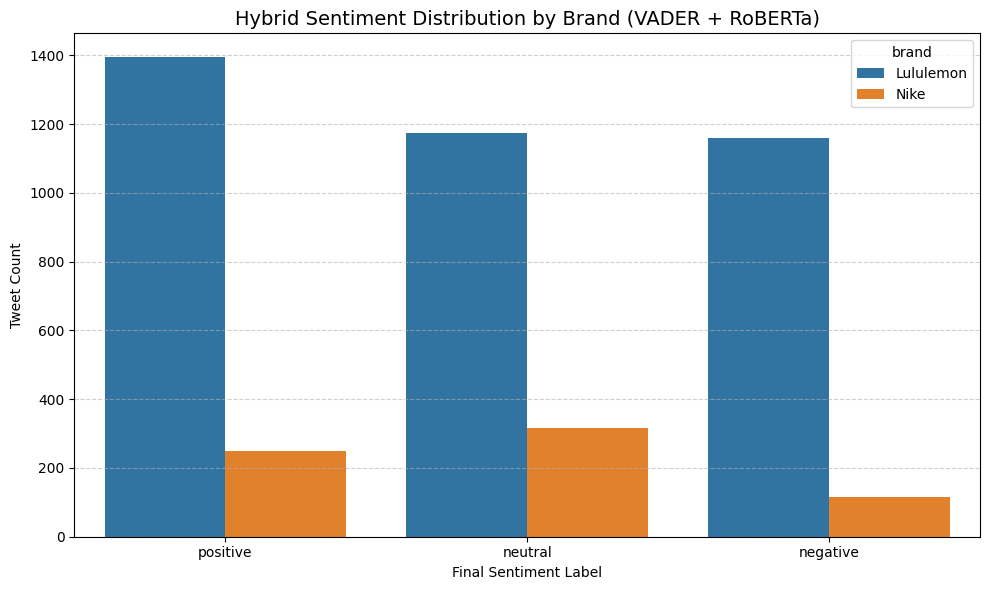

In [ ]:
# Plot hybrid sentiment
hybrid_df = pd.concat([lululemon_df[['final_sentiment_label', 'brand']], nike_df[['final_sentiment_label', 'brand']]])
plt.figure(figsize=(10, 6))
sns.countplot(data=hybrid_df, x='final_sentiment_label', hue='brand', order=['positive', 'neutral', 'negative'])
plt.title("Hybrid Sentiment Distribution by Brand (VADER + RoBERTa)", fontsize=14)
plt.xlabel("Final Sentiment Label")
plt.ylabel("Tweet Count")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
# Count reclassified tweets
lululemon_reclassified = (lululemon_df['sentiment_label'] != lululemon_df['final_sentiment_label']).sum()
nike_reclassified = (nike_df['sentiment_label'] != nike_df['final_sentiment_label']).sum()

# Total tweet counts
lululemon_total = len(lululemon_df)
nike_total = len(nike_df)

# percentage of reclassified
lululemon_pct = (lululemon_reclassified / lululemon_total) * 100
nike_pct = (nike_reclassified / nike_total) * 100

# --- Display results ---
print("Reclassification Summary")
print(f"Lululemon: {lululemon_reclassified} / {lululemon_total} tweets reclassified ({lululemon_pct:.1f}%)")
print(f"Nike: {nike_reclassified} / {nike_total} tweets reclassified ({nike_pct:.1f}%)")



Reclassification Summary
Lululemon: 1441 / 3728 tweets reclassified (38.7%)
Nike: 157 / 682 tweets reclassified (23.0%)


In [ ]:
import pandas as pd

# Count Sentiments: VADER
vader_lulu = lululemon_df['sentiment_label'].value_counts().reindex(['positive', 'neutral', 'negative'], fill_value=0)
vader_nike = nike_df['sentiment_label'].value_counts().reindex(['positive', 'neutral', 'negative'], fill_value=0)

# Count Sentiments: Hybrid
hybrid_lulu = lululemon_df['final_sentiment_label'].value_counts().reindex(['positive', 'neutral', 'negative'], fill_value=0)
hybrid_nike = nike_df['final_sentiment_label'].value_counts().reindex(['positive', 'neutral', 'negative'], fill_value=0)

# Combine into Table
comparison_df = pd.DataFrame({
    'Sentiment': ['positive', 'neutral', 'negative'],
    'Lululemon (VADER)': vader_lulu.values,
    'Nike (VADER)': vader_nike.values,
    'Lululemon (Hybrid)': hybrid_lulu.values,
    'Nike (Hybrid)': hybrid_nike.values
})

# Show Table
comparison_df.style.set_caption("Exact Sentiment Count Comparison").format(precision=0)


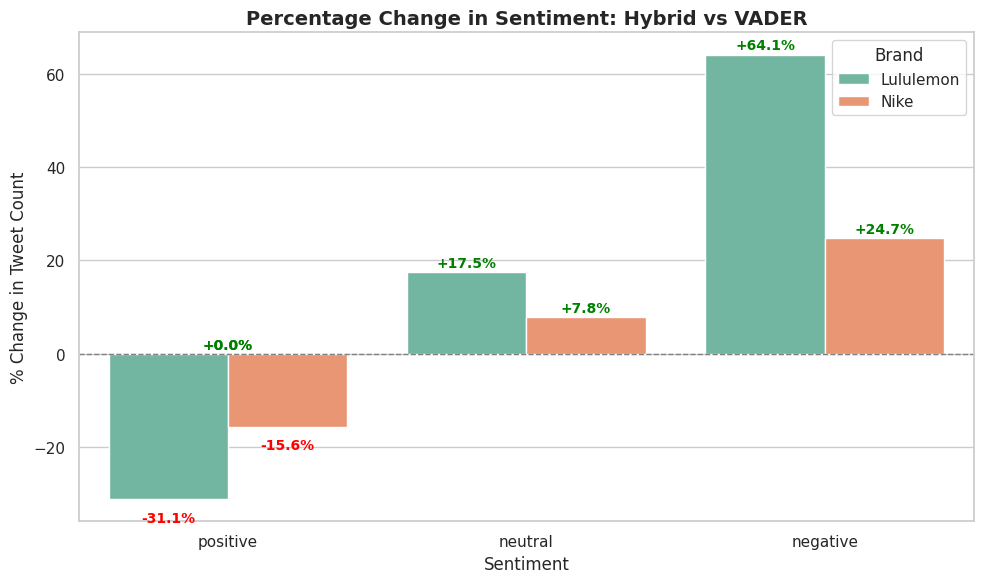

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# A before vs after bar chart showing sentiment shift
# Create % change
vader_counts = pd.concat([
    lululemon_df[['sentiment_label']].assign(brand='Lululemon'),
    nike_df[['sentiment_label']].assign(brand='Nike')
])
vader_summary = vader_counts.groupby(['brand', 'sentiment_label']).size().reset_index(name='vader_count')

hybrid_counts = pd.concat([
    lululemon_df[['final_sentiment_label']].rename(columns={'final_sentiment_label': 'sentiment_label'}).assign(brand='Lululemon'),
    nike_df[['final_sentiment_label']].rename(columns={'final_sentiment_label': 'sentiment_label'}).assign(brand='Nike')
])
hybrid_summary = hybrid_counts.groupby(['brand', 'sentiment_label']).size().reset_index(name='hybrid_count')

# VADER and Hybrid
merged = pd.merge(vader_summary, hybrid_summary, on=['brand', 'sentiment_label'])
merged['percentage_change'] = ((merged['hybrid_count'] - merged['vader_count']) /
                                merged['vader_count'].replace(0, 1)) * 100

# Plot the bar ghraph
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=merged,
    x='sentiment_label',
    y='percentage_change',
    hue='brand',
    palette='Set2',
    order=['positive', 'neutral', 'negative']
)

# Annotate bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{height:+.1f}%",
                (p.get_x() + p.get_width() / 2., height + (2 if height >= 0 else -4)),
                ha='center', va='center',
                fontsize=10, fontweight='bold',
                color='green' if height >= 0 else 'red')

# Titles and labels
plt.title('Percentage Change in Sentiment: Hybrid vs VADER', fontsize=14, fontweight='bold')
plt.ylabel('% Change in Tweet Count')
plt.xlabel('Sentiment')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.legend(title='Brand')
plt.tight_layout()
plt.show()


<ipython-input-56-2e9b421c9653>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=engagement_by_sentiment, x='final_sentiment_label', y='engagement', palette='Set2')


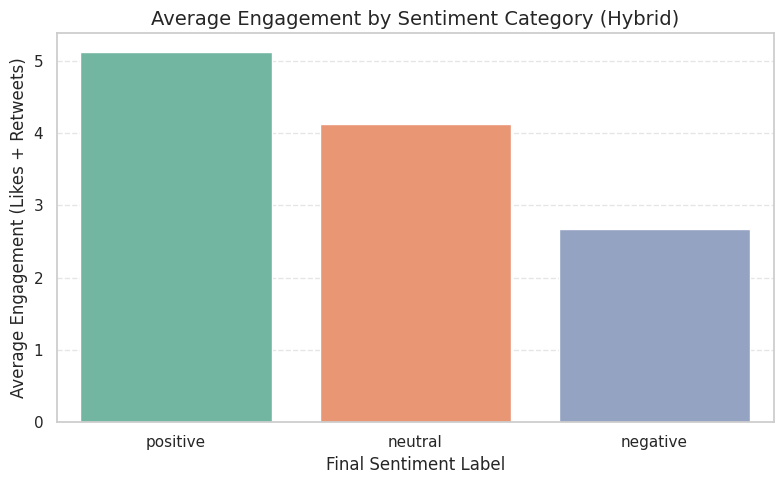

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Combine both brand DataFrames for analysis
combined_df = pd.concat([lululemon_df, nike_df], ignore_index=True)

# Group by sentiment and compute average engagement
engagement_by_sentiment = combined_df.groupby('final_sentiment_label')['engagement'].mean().reindex(['positive', 'neutral', 'negative']).reset_index()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=engagement_by_sentiment, x='final_sentiment_label', y='engagement', palette='Set2')
plt.title('Average Engagement by Sentiment Category (Hybrid)', fontsize=14)
plt.xlabel('Final Sentiment Label')
plt.ylabel('Average Engagement (Likes + Retweets)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Combine both DataFrames
combined_df = pd.concat([lululemon_df, nike_df], ignore_index=True)

# Group by sentiment and calculate average engagement
engagement_by_sentiment = (
    combined_df.groupby('final_sentiment_label')['engagement']
    .mean()
    .reindex(['positive', 'neutral', 'negative'])
    .reset_index()
)

# Rename for clarity and round for neatness
engagement_by_sentiment.columns = ['Sentiment', 'Average Engagement']
engagement_by_sentiment['Average Engagement'] = engagement_by_sentiment['Average Engagement'].round(2)

# Display
print("Average Engagement (Likes + Retweets) by Sentiment:")
print(engagement_by_sentiment.to_string(index=False))


Average Engagement (Likes + Retweets) by Sentiment:
Sentiment  Average Engagement
 positive                5.12
  neutral                4.13
 negative                2.68


##sentiment vs engagement

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# --- Combine relevant columns for plotting ---
lululemon_plot = lululemon_df[['sentiment_score', 'engagement', 'roberta_emotion']].copy()
lululemon_plot['brand'] = 'Lululemon'

nike_plot = nike_df[['sentiment_score', 'engagement', 'roberta_emotion']].copy()
nike_plot['brand'] = 'Nike'

# --- Merge datasets ---
combined_sentiment_plot = pd.concat([lululemon_plot, nike_plot], ignore_index=True)

# --- Clip engagement for clearer plotting ---
combined_sentiment_plot['engagement'] = combined_sentiment_plot['engagement'].clip(upper=100)


# Plotly Interactive with Emotion Tooltip
fig = px.scatter(
    combined_sentiment_plot,
    x='sentiment_score',
    y='engagement',
    color='brand',
    hover_data=['roberta_emotion'],
    title="💬 Sentiment vs Engagement with Emotion Tags (Nike vs Lululemon)",
    labels={
        'sentiment_score': 'Sentiment Score',
        'engagement': 'Engagement (Likes + Retweets)',
        'roberta_emotion': 'Emotion'
    },
    opacity=0.6,
    width=950,
    height=600
)
fig.update_layout(template='plotly_white')
fig.show()


#Type of users, Interaction Networks, & Micro-influencers

##Types of Users

In [ ]:
def categorize_user(row):
    followers = row.get('user.followers_count') or row.get('followers_count') or 0
    friends = row.get('user.friends_count') or row.get('friends_count') or 0
    verified = row.get('user.verified') if 'user.verified' in row else row.get('verified')

    verified = bool(verified)  # Just in case it's None or NaN

    if verified and followers > 100000:
        return 'Public Figure / Brand'
    elif 1000 <= followers <= 50000:
        return 'Micro-Influencer'
    elif followers < 1000 and friends > 500:
        return 'Highly Social User'
    elif followers < 1000:
        return 'General User'
    else:
        return 'Other'

lululemon_df['user_type'] = lululemon_df.apply(categorize_user, axis=1)
nike_df['user_type'] = nike_df.apply(categorize_user, axis=1)


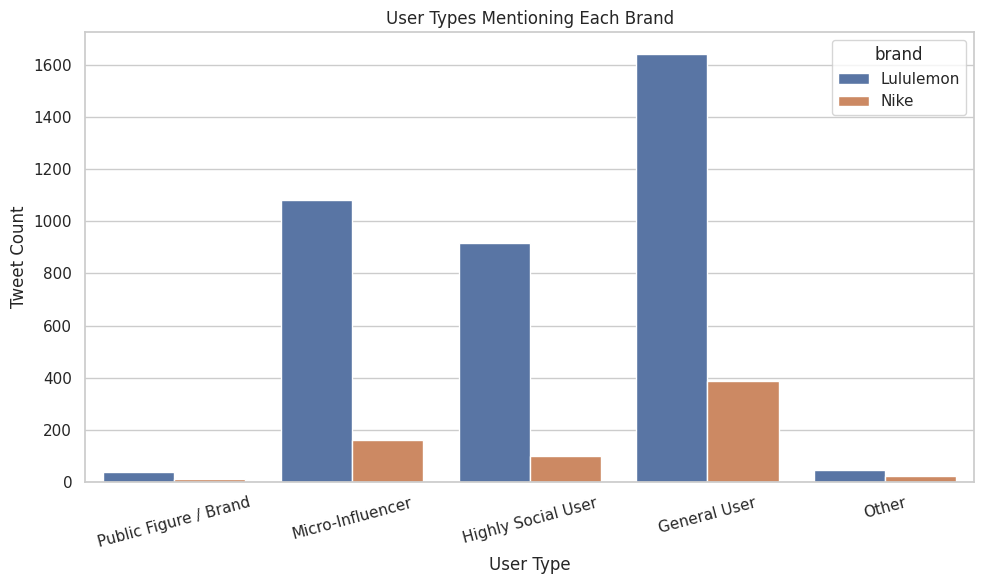

In [ ]:
# Prepare for plotting
lululemon_user_types = lululemon_df[['user_type']].copy()
lululemon_user_types['brand'] = 'Lululemon'

nike_user_types = nike_df[['user_type']].copy()
nike_user_types['brand'] = 'Nike'

user_types_combined = pd.concat([lululemon_user_types, nike_user_types])

# Plot user types
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(data=user_types_combined, x='user_type', hue='brand', order=[
    'Public Figure / Brand', 'Micro-Influencer', 'Highly Social User', 'General User', 'Other'])
plt.title("User Types Mentioning Each Brand")
plt.xlabel("User Type")
plt.ylabel("Tweet Count")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


## Lululemon Micro-influencer

In [ ]:
# Lululemon Aggregate user stats
lululemon_df['engagement'] = lululemon_df['retweet_count'] + lululemon_df['favorite_count']

lululemon_users = (
    lululemon_df.groupby(['user.id', 'user.name', 'user.screen_name', 'user.followers_count'])
    .agg(
        tweet_count=('text', 'count'),
        total_engagement=('engagement', 'sum'),
        avg_engagement=('engagement', 'mean')
    )
    .reset_index()
)

lululemon_users['engagement_rate'] = lululemon_users['avg_engagement'] / (lululemon_users['user.followers_count'] + 1)

lululemon_sentiment = lululemon_df.groupby('user.id')['final_sentiment_label'].agg(lambda x: x.value_counts().idxmax()).reset_index()
lululemon_users = lululemon_users.merge(lululemon_sentiment, on='user.id', how='left')


In [ ]:
# Lululemon criteria
LULU_MIN_FOLLOWERS = 1000
LULU_MAX_FOLLOWERS = 50000
LULU_MIN_TWEETS = 2
LULU_MIN_ENGAGEMENT = 50
LULU_MIN_FF_RATIO = 0.5

In [ ]:
lululemon_micro = lululemon_users[
    (lululemon_users['user.followers_count'].between(LULU_MIN_FOLLOWERS, LULU_MAX_FOLLOWERS)) &
    (lululemon_users['final_sentiment_label'] == 'positive') &
    (lululemon_users['tweet_count'] >= LULU_MIN_TWEETS) &
    (lululemon_users['total_engagement'] >= LULU_MIN_ENGAGEMENT)
].copy()

# Remove brand-affiliated users
exclude_keywords_lulu = ['ceo', 'founder', 'lululemon']
exclude_names_lulu = ['calvinmcdonald']

lululemon_micro = lululemon_micro[
    ~lululemon_micro['user.name'].str.lower().str.contains('|'.join(exclude_keywords_lulu), na=False) &
    ~lululemon_micro['user.screen_name'].str.lower().str.contains('|'.join(exclude_keywords_lulu + exclude_names_lulu), na=False)
]

# FF ratio
lululemon_micro = lululemon_micro.merge(
    lululemon_df[['user.id', 'user.friends_count']].drop_duplicates(),
    on='user.id', how='left'
)
lululemon_micro['ff_ratio'] = lululemon_micro['user.followers_count'] / (lululemon_micro['user.friends_count'] + 1)
lululemon_micro = lululemon_micro[lululemon_micro['ff_ratio'] >= LULU_MIN_FF_RATIO]

# Remove numeric screen names
lululemon_micro = lululemon_micro[~lululemon_micro['user.screen_name'].str.match(r'^\d+$', na=False)]

# Deduplicate
lululemon_micro = lululemon_micro.drop_duplicates(subset=['user.id'])


In [ ]:
print("Top Lululemon Micro-Influencers:")
display(lululemon_micro[['user.name', 'user.screen_name', 'user.followers_count', 'tweet_count', 'total_engagement', 'engagement_rate', 'final_sentiment_label']].head(5))

Top Lululemon Micro-Influencers:


user.name user.screen_name  user.followers_count  tweet_count  \
0            Caylee          2kaRask                 13943            2   
1              Dawn  _dawnmontgomery                 11061            2   
3  Victoria Tidwell      ToriTidwell                  4373            3   

   total_engagement  engagement_rate final_sentiment_label  
0               385         0.013805              positive  
1                55         0.002486              positive  
3                68         0.005182              positive

##Nike Micro-Influencer

In [ ]:
# Nike Aggregate user stats
nike_df['engagement'] = nike_df['retweet_count'] + nike_df['favorite_count']

nike_users = (
    nike_df.groupby('author_id')
    .agg(
        tweet_count=('text', 'count'),
        total_engagement=('engagement', 'sum'),
        avg_engagement=('engagement', 'mean'),
        followers_count=('followers_count', 'first'),
        friends_count=('friends_count', 'first')
    )
    .reset_index()
)

nike_users['engagement_rate'] = nike_users['avg_engagement'] / (nike_users['followers_count'] + 1)

nike_sentiment = nike_df.groupby('author_id')['final_sentiment_label'].agg(lambda x: x.value_counts().idxmax()).reset_index()
nike_users = nike_users.merge(nike_sentiment, on='author_id', how='left')


In [ ]:
# Nike Criteria
NIKE_MIN_FOLLOWERS = 1000
NIKE_MAX_FOLLOWERS = 50000
NIKE_MIN_TWEETS = 2
NIKE_MIN_ENGAGEMENT = 50
NIKE_MIN_FF_RATIO = 0.5


In [ ]:
# Apply filter
nike_micro = nike_users[
    (nike_users['followers_count'].between(NIKE_MIN_FOLLOWERS, NIKE_MAX_FOLLOWERS)) &
    (nike_users['final_sentiment_label'] == 'positive') &
    (nike_users['tweet_count'] >= NIKE_MIN_TWEETS) &
    (nike_users['total_engagement'] >= NIKE_MIN_ENGAGEMENT)
].copy()

# Normalize and handle friends_count safely avoiding errors
nike_df.columns = nike_df.columns.str.strip()
nike_micro.columns = nike_micro.columns.str.strip()

if 'friends_count' in nike_df.columns:
    print("'friends_count' found — checking Nike micro-influencer table...")

    if 'friends_count' in nike_micro.columns:
        nike_micro = nike_micro.drop(columns=['friends_count'], errors='ignore')

    ff_data = nike_df[['author_id', 'friends_count']].drop_duplicates().copy()
    nike_micro = nike_micro.merge(ff_data, on='author_id', how='left')
    nike_micro['ff_ratio'] = nike_micro['followers_count'] / (nike_micro['friends_count'] + 1)
    nike_micro = nike_micro[nike_micro['ff_ratio'] >= NIKE_MIN_FF_RATIO]

    print("FF ratio filter applied — Nike micro-influencers filtered.")
else:
    print("'friends_count' not found — skipping FF ratio filter for Nike.")

# Final deduplication — keeping most engaged version of each influencer
nike_micro = nike_micro.sort_values('total_engagement', ascending=False)
nike_micro = nike_micro.drop_duplicates(subset='author_id', keep='first')

# Display top influencers
print("\n Top Nike Micro-Influencers (Relaxed Criteria):")
display(nike_micro[['author_id', 'followers_count', 'tweet_count', 'total_engagement', 'engagement_rate', 'final_sentiment_label']].head(5))


'friends_count' found — checking Nike micro-influencer table...
FF ratio filter applied — Nike micro-influencers filtered.

 Top Nike Micro-Influencers (Relaxed Criteria):


author_id  followers_count  tweet_count  total_engagement  \
3  1.450000e+18             2371            3               778   
1  1.200000e+18             6077            3               336   
0  1.083909e+08            11780            2               204   

   engagement_rate final_sentiment_label  
3         0.109331              positive  
1         0.018427              positive  
0         0.008658              positive

##Micro-influencer Identification


In [ ]:
def generate_influencer_profiles(df_full, df_micro, brand_col='user.screen_name', name_col='user.name', id_col='user.id', brand_name='Lululemon', top_n=3):
    """
    Displays formatted influencer profiles including their top tweet.
    """
    print(f"\n📢 Top {top_n} {brand_name} Micro-Influencer Profiles\n" + "-"*60)

    for i, row in df_micro.head(top_n).iterrows():
        # Match tweet from original dataset
        if 'user.id' in df_full.columns:
            tweets = df_full[df_full['user.id'] == row[id_col]]
        else:
            tweets = df_full[df_full['author_id'] == row[id_col]]

        sample_tweet = tweets['text'].iloc[0] if not tweets.empty else "No tweet available"

        print(f"👤 {row[name_col]} (@{row[brand_col]})")
        print(f"Followers: {row.get('user.followers_count', row.get('followers_count')):,}")
        print(f"Tweets: {row['tweet_count']}, Total Engagement: {row['total_engagement']}, Engagement Rate: {row['engagement_rate']:.4f}")
        print(f"Sample Tweet: {sample_tweet}")
        print("-"*60)

# Lululemon
generate_influencer_profiles(
    df_full=lululemon_df,
    df_micro=lululemon_micro,
    brand_col='user.screen_name',
    name_col='user.name',
    id_col='user.id',
    brand_name='Lululemon'
)

# Nike
generate_influencer_profiles(
    df_full=nike_df,
    df_micro=nike_micro,
    brand_col='author_id',  # author_id only, no screen_name or name in Nike users
    name_col='author_id',
    id_col='author_id',
    brand_name='Nike'
)



📢 Top 3 Lululemon Micro-Influencer Profiles
------------------------------------------------------------
👤 Caylee (@2kaRask)
Followers: 13,943
Tweets: 2, Total Engagement: 385, Engagement Rate: 0.0138
Sample Tweet: Dear Santa, bring me more @lululemon for Christmas https://t.co/FxYQwmDc2N
------------------------------------------------------------
👤 Dawn (@_dawnmontgomery)
Followers: 11,061
Tweets: 2, Total Engagement: 55, Engagement Rate: 0.0025
Sample Tweet: I need a @lululemon gift card. $500 will do.
------------------------------------------------------------
👤 Victoria Tidwell (@ToriTidwell)
Followers: 4,373
Tweets: 3, Total Engagement: 68, Engagement Rate: 0.0052
Sample Tweet: .@Lululemon you have one of the best associates working at your store in Marietta, GA. Her name is Wilson. She is ALWAYS positive, helpful, cheery, and just a joy to be around. She deserves to be recognized for making the shopping experience comfortable and enjoyable. ❤️❤️❤️
-----------------------------

In [ ]:
# Concatenate user types for both brands
user_type_counts = pd.concat([
    lululemon_df[['user_type', 'brand']],
    nike_df[['user_type', 'brand']]
])

# Count total users per type and calculate percentage
user_type_percentages = (
    user_type_counts
    .groupby(['brand', 'user_type'])
    .size()
    .rename('count')
    .reset_index()
)

# Calculate percentage per brand without reseting the index
user_type_percentages['percentage'] = user_type_percentages.groupby('brand')['count'].transform(lambda x: round(100 * x / x.sum(), 1))

print("🔢 User Type Proportion (%):")
display(user_type_percentages.sort_values(['brand', 'percentage'], ascending=[True, False]))

🔢 User Type Proportion (%):


brand              user_type  count  percentage
0  Lululemon           General User   1643        44.1
2  Lululemon       Micro-Influencer   1083        29.1
1  Lululemon     Highly Social User    916        24.6
3  Lululemon                  Other     46         1.2
4  Lululemon  Public Figure / Brand     40         1.1
5       Nike           General User    388        56.9
7       Nike       Micro-Influencer    160        23.5
6       Nike     Highly Social User     99        14.5
8       Nike                  Other     24         3.5
9       Nike  Public Figure / Brand     11         1.6

In [ ]:
# Combine brand data
engagement_by_user_type = pd.concat([
    lululemon_df[['user_type', 'engagement']].assign(brand='Lululemon'),
    nike_df[['user_type', 'engagement']].assign(brand='Nike')
])

avg_engagement = (
    engagement_by_user_type
    .groupby(['brand', 'user_type'])['engagement']
    .mean()
    .round(2)
    .reset_index()
    .sort_values(['brand', 'engagement'], ascending=[True, False])
)

print("Average Engagement by User Type:")
display(avg_engagement)


Average Engagement by User Type:


brand              user_type  engagement
3  Lululemon                  Other       53.76
4  Lululemon  Public Figure / Brand       48.75
2  Lululemon       Micro-Influencer        5.09
1  Lululemon     Highly Social User        1.78
0  Lululemon           General User        1.01
7       Nike       Micro-Influencer       20.36
9       Nike  Public Figure / Brand        6.91
6       Nike     Highly Social User        5.70
8       Nike                  Other        2.62
5       Nike           General User        2.09

In [ ]:
from scipy.stats import pearsonr

# Compute correlation per brand
print("📈 Correlation Between Follower Count and Engagement Rate:\n")

for brand, df in [('Lululemon', lululemon_micro), ('Nike', nike_micro)]:
    x = df['user.followers_count'] if brand == 'Lululemon' else df['followers_count']
    y = df['engagement_rate']

    corr, pval = pearsonr(x, y)
    print(f"🔹 {brand}: r = {corr:.3f}, p = {pval:.4f}")


📈 Correlation Between Follower Count and Engagement Rate:

🔹 Lululemon: r = 0.558, p = 0.6235
🔹 Nike: r = -0.849, p = 0.3549


In [ ]:
import re

# count how often micro-influencers are mentioned
# Combine screen names of all micro-influencers
lululemon_handles = lululemon_micro['user.screen_name'].str.lower().tolist()
nike_handles = nike_micro['author_id'].astype(str).str.lower().tolist()

# Function to count how often a handle is mentioned
def count_mentions(df, handles, handle_col):
    mentions = {handle: 0 for handle in handles}
    for text in df['text'].astype(str):
        text = text.lower()
        for handle in handles:
            if f"@{handle}" in text:
                mentions[handle] += 1
    mention_df = pd.DataFrame(list(mentions.items()), columns=[handle_col, 'mention_count'])
    return mention_df[mention_df['mention_count'] > 0]

# Count Lululemon micro-influencer mentions
lulu_mentions_df = count_mentions(lululemon_df, lululemon_handles, 'user.screen_name')
lululemon_micro = lululemon_micro.merge(lulu_mentions_df, on='user.screen_name', how='left')
lululemon_micro['mention_count'] = lululemon_micro['mention_count'].fillna(0).astype(int)

# Count Nike micro-influencer mentions
nike_mentions_df = count_mentions(nike_df, nike_handles, 'author_id')
nike_micro['author_id'] = nike_micro['author_id'].astype(str)
nike_mentions_df['author_id'] = nike_mentions_df['author_id'].astype(str)
nike_micro = nike_micro.merge(nike_mentions_df, on='author_id', how='left')
nike_micro['mention_count'] = nike_micro['mention_count'].fillna(0).astype(int)

# Display results
print(" Lululemon Micro-Influencer Network Mentions:")
display(lululemon_micro[['user.screen_name', 'mention_count', 'engagement_rate']].sort_values(by='mention_count', ascending=False).head(5))

print("\n Nike Micro-Influencer Network Mentions:")
display(nike_micro[['author_id', 'mention_count', 'engagement_rate']].sort_values(by='mention_count', ascending=False).head(5))


 Lululemon Micro-Influencer Network Mentions:


user.screen_name  mention_count  engagement_rate
1  _dawnmontgomery              4         0.002486
0          2kaRask              0         0.013805
2      ToriTidwell              0         0.005182


 Nike Micro-Influencer Network Mentions:


author_id  mention_count  engagement_rate
0     1.45e+18              0         0.109331
1      1.2e+18              0         0.018427
2  108390895.0              0         0.008658

##Brand Mentions & Interaction Networks.

In [ ]:
import pandas as pd

def classify_interaction(text):
    text = str(text).strip().lower()
    if text.startswith("rt"):
        return "retweet"
    elif re.match(r"^@\w+", text):
        return "reply"
    elif "@" in text:
        return "mention"
    else:
        return "Tweet"

# Apply to each dataset
lululemon_df['interaction_type'] = lululemon_df['text'].apply(classify_interaction)
nike_df['interaction_type'] = nike_df['text'].apply(classify_interaction)

# Count proportions
lululemon_interactions = lululemon_df['interaction_type'].value_counts(normalize=True).rename("Lululemon") * 100
nike_interactions = nike_df['interaction_type'].value_counts(normalize=True).rename("Nike") * 100

# Combine into single table
interaction_summary = pd.concat([lululemon_interactions, nike_interactions], axis=1).fillna(0).round(1)

# Display
print(" Interaction Type Distribution (% of total tweets):")
display(interaction_summary)


 Interaction Type Distribution (% of total tweets):


Lululemon  Nike
interaction_type                 
reply                  63.4   5.4
mention                36.3  19.1
Tweet                   0.2  75.5

In [ ]:
import re

def extract_mentions(text):
    if not isinstance(text, str):
        return []
    return re.findall(r'@(\w+)', text)

# Add mentions column
lululemon_df['mentions'] = lululemon_df['text'].apply(extract_mentions)
nike_df['mentions'] = nike_df['text'].apply(extract_mentions)


In [ ]:
# Convert tweet author to source and mentioned users to targets
lululemon_edges = []
for _, row in lululemon_df.iterrows():
    author = row.get('user.screen_name')
    for mention in row['mentions']:
        lululemon_edges.append((author, mention))

nike_edges = []
for _, row in nike_df.iterrows():
    author = row.get('user.screen_name') or row.get('author_id')
    for mention in row['mentions']:
        nike_edges.append((str(author), mention))


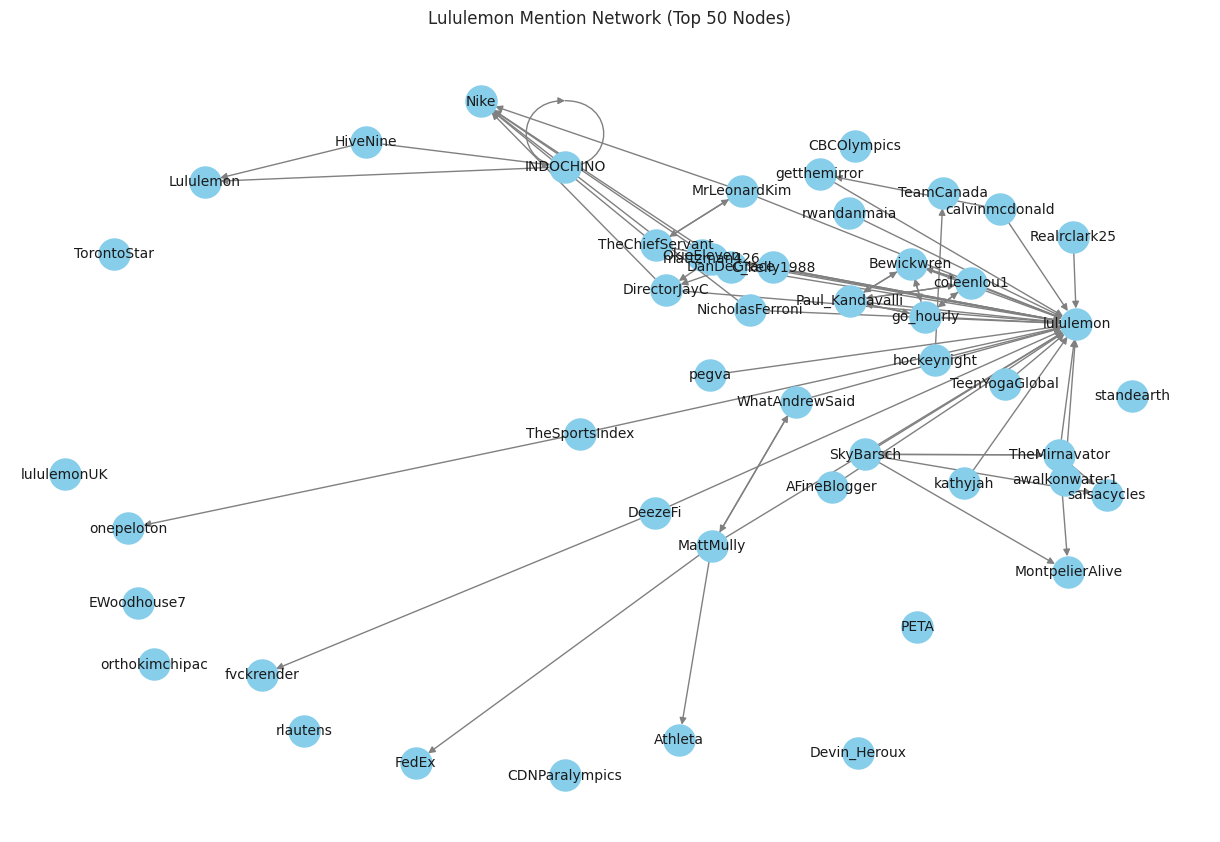

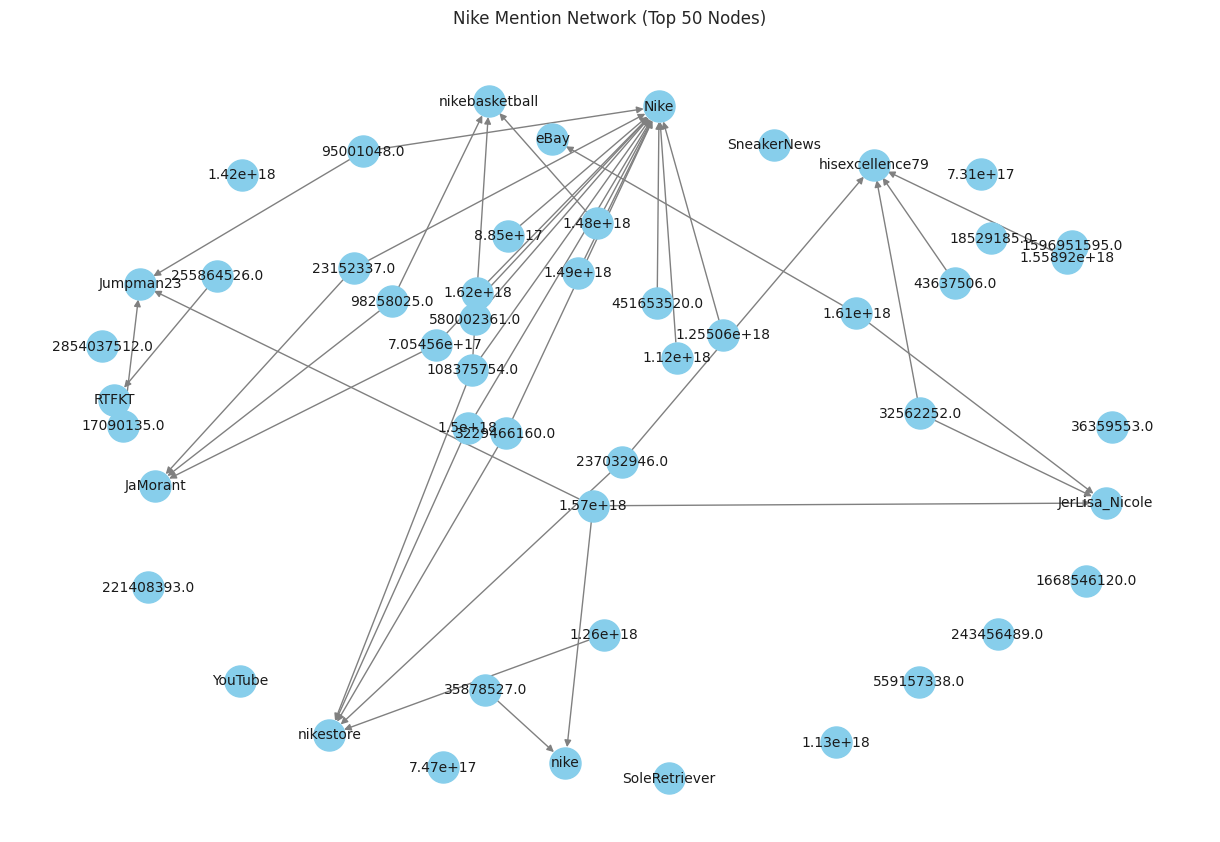

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def plot_mention_graph(edges, brand, top_n=50):
    G = nx.DiGraph()
    G.add_edges_from(edges)

    degrees = sorted(G.degree, key=lambda x: x[1], reverse=True)[:top_n]
    sub_nodes = [node for node, _ in degrees]
    subgraph = G.subgraph(sub_nodes)

    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(subgraph, k=0.5, seed=42)
    nx.draw(subgraph, pos, with_labels=True, node_color='skyblue', edge_color='gray',
            node_size=500, font_size=10)
    plt.title(f"{brand} Mention Network (Top {top_n} Nodes)")
    plt.axis('off')
    plt.show()

# Plot networks
plot_mention_graph(lululemon_edges, 'Lululemon')
plot_mention_graph(nike_edges, 'Nike')


In [ ]:
# Calculate centralities for insight
def compute_centralities(edges):
    G = nx.DiGraph()
    G.add_edges_from(edges)
    centrality = nx.degree_centrality(G)
    betweenness = nx.betweenness_centrality(G)
    top_nodes = sorted(centrality.items(), key=lambda x: x[1], reverse=True)[:10]
    return pd.DataFrame({
        "user": [u for u, _ in top_nodes],
        "degree_centrality": [centrality[u] for u, _ in top_nodes],
        "betweenness": [betweenness[u] for u, _ in top_nodes]
    })

lululemon_centrality = compute_centralities(lululemon_edges)
nike_centrality = compute_centralities(nike_edges)

import pandas as pd
from IPython.display import display
print("Top Lululemon Mention Network Nodes:")
display(lululemon_centrality)

print("Top Nike Mention Network Nodes:")
display(nike_centrality)


Top Lululemon Mention Network Nodes:


user  degree_centrality  betweenness
0       lululemon           0.612076     0.000000
1      TeamCanada           0.028454     0.000000
2  TheSportsIndex           0.025413     0.000000
3      standearth           0.017159     0.000000
4  calvinmcdonald           0.015204     0.000036
5         DeezeFi           0.013249     0.000023
6    DirectorJayC           0.010209     0.000002
7     hockeynight           0.009557     0.000000
8      onepeloton           0.008471     0.000000
9            Nike           0.008254     0.000000

Top Nike Mention Network Nodes:


user  degree_centrality  betweenness
0             Nike           0.097179          0.0
1       95001048.0           0.031348          0.0
2      1.55892e+18           0.031348          0.0
3          1.5e+18           0.028213          0.0
4        nikestore           0.025078          0.0
5             nike           0.025078          0.0
6     1668546120.0           0.025078          0.0
7  hisexcellence79           0.025078          0.0
8     1596951595.0           0.021944          0.0
9      221408393.0           0.021944          0.0

In [ ]:
import networkx as nx

# Create the mention graphs
lululemon_mention_graph = nx.DiGraph()
lululemon_mention_graph.add_edges_from(lululemon_edges)

nike_mention_graph = nx.DiGraph()
nike_mention_graph.add_edges_from(nike_edges)


# Compute basic network metrics
lululemon_density = nx.density(lululemon_mention_graph)
nike_density = nx.density(nike_mention_graph)

lululemon_clustering = nx.average_clustering(nx.Graph(lululemon_mention_graph))
nike_clustering = nx.average_clustering(nx.Graph(nike_mention_graph))

print(f"Lululemon – Density: {lululemon_density:.4f}, Avg. Clustering Coefficient: {lululemon_clustering:.4f}")
print(f"Nike – Density: {nike_density:.4f}, Avg. Clustering Coefficient: {nike_clustering:.4f}")

Lululemon – Density: 0.0003, Avg. Clustering Coefficient: 0.1551
Nike – Density: 0.0027, Avg. Clustering Coefficient: 0.0000


In [ ]:
import re
from collections import defaultdict
import pandas as pd

# Function to extract @mentions from text
def extract_mentions(text):
    if isinstance(text, str):
        return re.findall(r'@([A-Za-z0-9_]+)', text)
    return []

# Extract mentions from text
combined_df['mentions'] = combined_df['text'].apply(extract_mentions)

# Dictionary to store total engagement per mentioned user
mention_engagement = defaultdict(int)

# Loop through each tweet and aggregate engagement per mention
for _, row in combined_df.iterrows():
    mentions = row['mentions']
    engagement = row['engagement']
    for mention in mentions:
        # Exclude 'nike' and 'lululemon' mentions
        if mention.lower() not in ['nike', 'lululemon']:
            mention_engagement[mention] += engagement

# Convert to DataFrame and sort
mention_engagement_df = pd.DataFrame(list(mention_engagement.items()), columns=['user', 'total_engagement'])
mention_engagement_df = mention_engagement_df.sort_values(by='total_engagement', ascending=False).head(10)

# Display results
mention_engagement_df


user  total_engagement
185        TeamCanada               955
2228          IBGDRGN               724
2237  hisexcellence79               322
1965        floramcg7               299
1966     TheGameSheet               297
1367  YaleMBasketball               280
1368       kiki_rice0               280
1091        GetUpESPN               270
1092          ESPNNFL               270
1093       Espngreeny               270

#Topic Analysis

##Hashtag Analysis & Hashtag Cloud

In [ ]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

# Hashtag Extraction Function
def extract_hashtags_from_text(text_series):
    """Extracts hashtags from a pandas Series of tweet text."""
    all_hashtags = []
    for text in text_series.dropna():
        tags = re.findall(r"#\w+", str(text).lower())
        all_hashtags.extend(tag.strip("#") for tag in tags)
    return all_hashtags

# Get Hashtag Counts
lululemon_hashtags = extract_hashtags_from_text(lululemon_df['text'])
nike_hashtags = extract_hashtags_from_text(nike_df['text'])

lululemon_tag_counts = Counter(lululemon_hashtags)
nike_tag_counts = Counter(nike_hashtags)

# Word Cloud Plotter
def plot_wordcloud(tag_counts, brand):
    wc = WordCloud(width=800, height=400, background_color='white', colormap='viridis')
    wc.generate_from_frequencies(tag_counts)

    plt.figure(figsize=(12, 6))
    plt.imshow(wc, interpolation='bilinear')
    plt.title(f"Top Hashtags — {brand}", fontsize=16)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Bar Chart plotter
def plot_top_hashtags_bar(tag_counts, brand, top_n=10):
    top_tags = tag_counts.most_common(top_n)
    tags, counts = zip(*top_tags)

    plt.figure(figsize=(10, 5))
    plt.barh(tags[::-1], counts[::-1], color='skyblue')
    plt.title(f"Top {top_n} Hashtags — {brand}")
    plt.xlabel("Frequency")
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

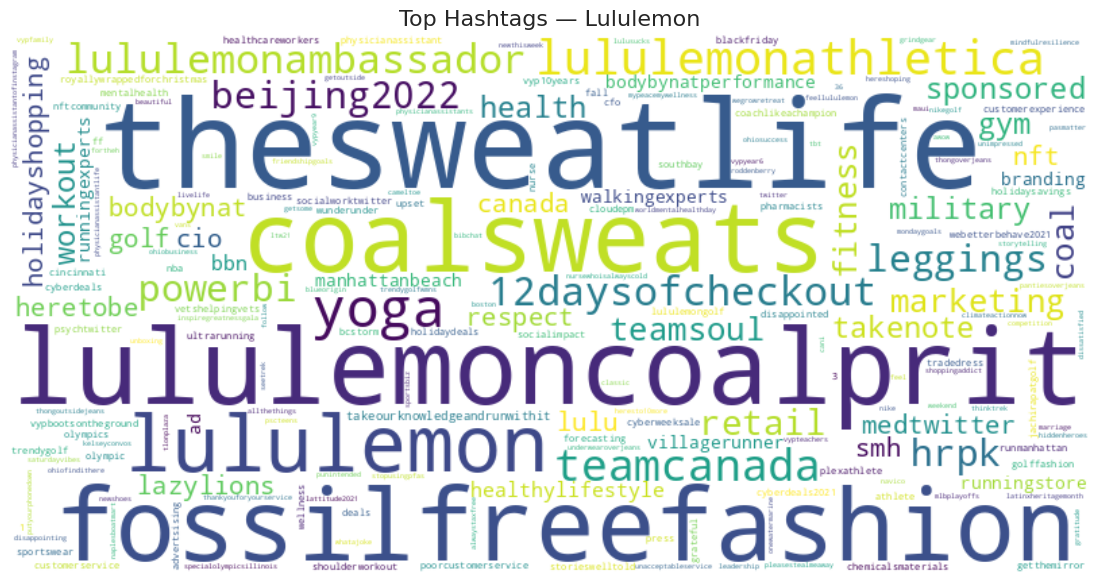

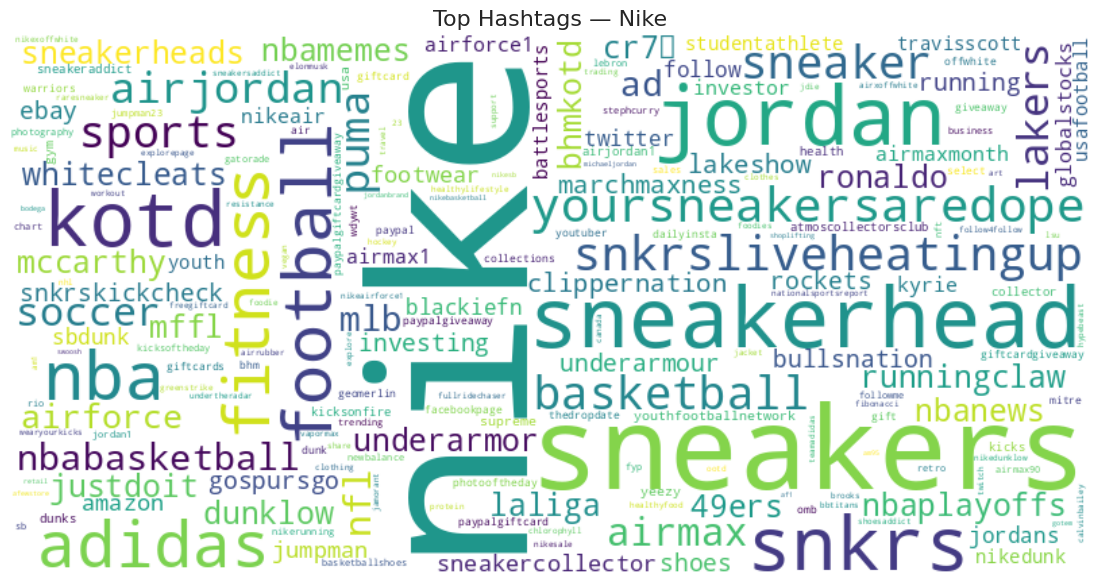

In [ ]:
# word cloud Visualizations
plot_wordcloud(lululemon_tag_counts, "Lululemon")
plot_wordcloud(nike_tag_counts, "Nike")

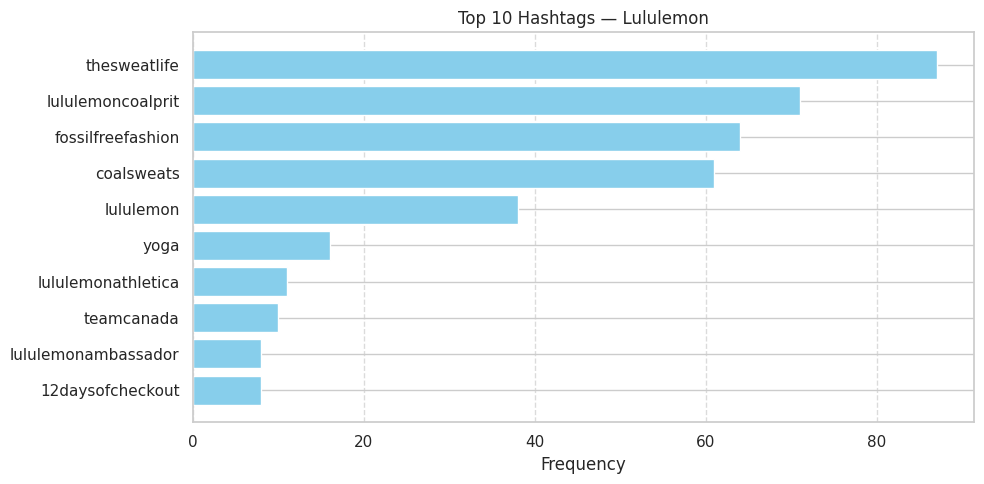

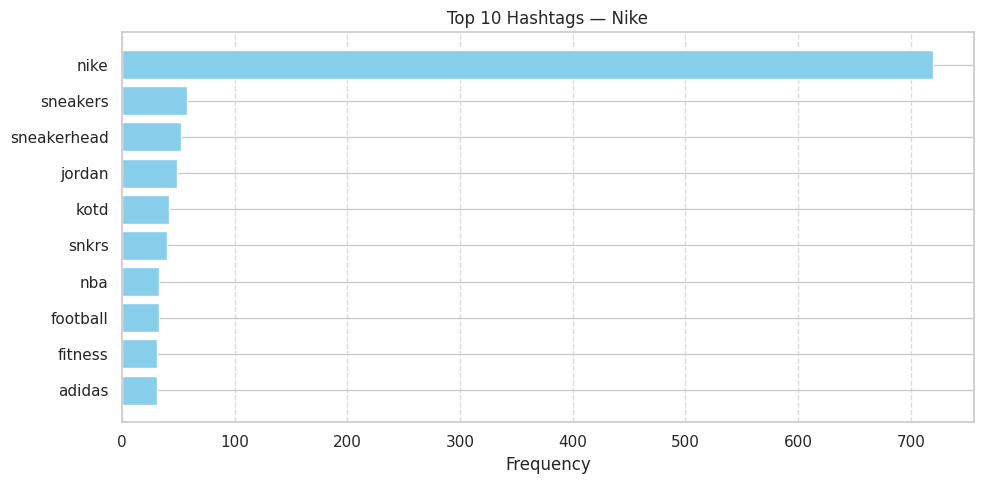

 Top 10 Lululemon Hashtags: [('thesweatlife', 87), ('lululemoncoalprit', 71), ('fossilfreefashion', 64), ('coalsweats', 61), ('lululemon', 38), ('yoga', 16), ('lululemonathletica', 11), ('teamcanada', 10), ('lululemonambassador', 8), ('12daysofcheckout', 8)]
 Top 10 Nike Hashtags: [('nike', 720), ('sneakers', 58), ('sneakerhead', 52), ('jordan', 49), ('kotd', 42), ('snkrs', 40), ('nba', 33), ('football', 33), ('fitness', 31), ('adidas', 31)]


In [ ]:
# Top Hashtags visualization
plot_top_hashtags_bar(lululemon_tag_counts, "Lululemon")
plot_top_hashtags_bar(nike_tag_counts, "Nike")

# Top Hashtags Text
print(" Top 10 Lululemon Hashtags:", lululemon_tag_counts.most_common(10))
print(" Top 10 Nike Hashtags:", nike_tag_counts.most_common(10))


Since some generic words are dominating the hashtag analysis (specially for nike), a list of hashtags excluding genric words helped understand hashtags used even further.

In [ ]:
from collections import Counter
# Top Hashtags excluding generic words
# Filter out generic hashtags
def filter_generic_tags(tag_counts, exclude_tags):
    """Removes generic/common tags from tag counts."""
    return Counter({tag: count for tag, count in tag_counts.items() if tag not in exclude_tags})

# Print Top Hashtags with % of Total
def print_top_tags_with_pct(tag_counts, top_n=10):
    """Prints top N hashtags with relative percentage."""
    total = sum(tag_counts.values())
    print(f"Top {top_n} Hashtags ({total:,} total tags):")
    for tag, count in tag_counts.most_common(top_n):
        pct = (count / total) * 100
        print(f"  #{tag}: {count} ({pct:.2f}%)")

# Set of Generic Tags to Exclude
generic_tags = {"nike", "lululemon", "style", "shoes", "fitness", "yoga", "retail", "fashion", "lululemonathletica"}

# Apply Filtering
lululemon_filtered_counts = filter_generic_tags(lululemon_tag_counts, generic_tags)
nike_filtered_counts = filter_generic_tags(nike_tag_counts, generic_tags)

# Print Top Hashtags with Percentages
print("🔹 Lululemon:")
print_top_tags_with_pct(lululemon_filtered_counts)

print("\n🔸 Nike:")
print_top_tags_with_pct(nike_filtered_counts)


🔹 Lululemon:
Top 10 Hashtags (1,064 total tags):
  #thesweatlife: 87 (8.18%)
  #lululemoncoalprit: 71 (6.67%)
  #fossilfreefashion: 64 (6.02%)
  #coalsweats: 61 (5.73%)
  #teamcanada: 10 (0.94%)
  #lululemonambassador: 8 (0.75%)
  #12daysofcheckout: 8 (0.75%)
  #hrpk: 7 (0.66%)
  #powerbi: 7 (0.66%)
  #leggings: 7 (0.66%)

🔸 Nike:
Top 10 Hashtags (3,343 total tags):
  #sneakers: 58 (1.73%)
  #sneakerhead: 52 (1.56%)
  #jordan: 49 (1.47%)
  #kotd: 42 (1.26%)
  #snkrs: 40 (1.20%)
  #nba: 33 (0.99%)
  #football: 33 (0.99%)
  #adidas: 31 (0.93%)
  #yoursneakersaredope: 30 (0.90%)
  #snkrsliveheatingup: 28 (0.84%)


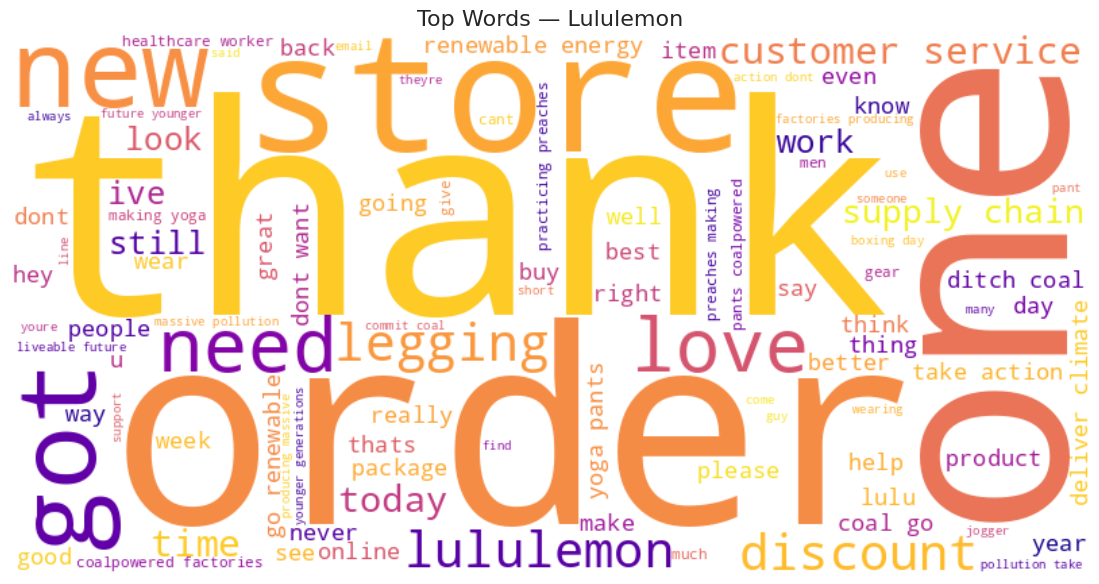

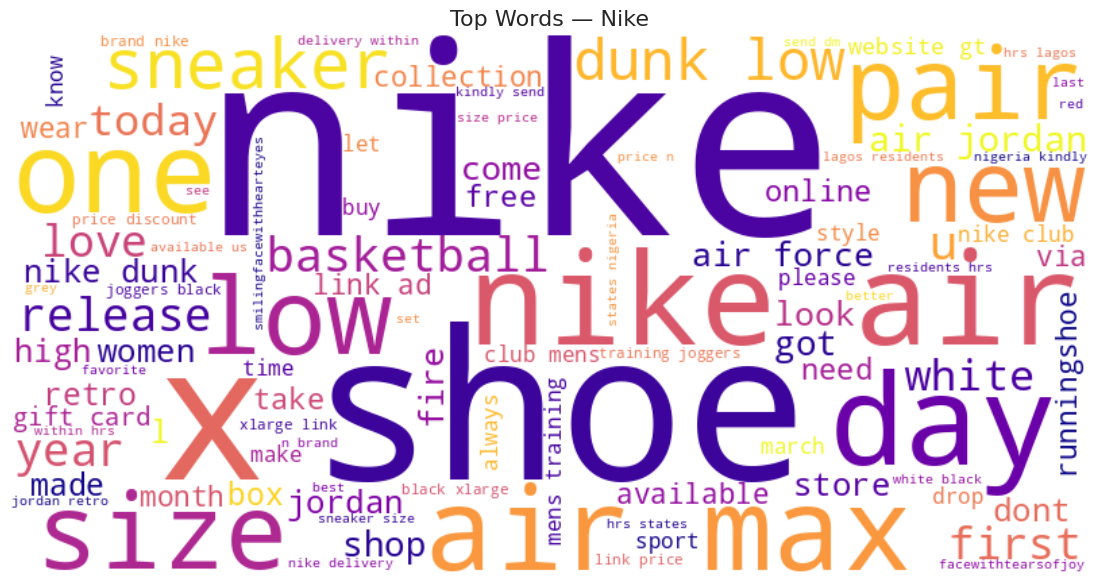

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_wordcloud_from_clean_text(df, brand, text_column='clean_text'):
    """Generates a word cloud from the cleaned text column of a tweet DataFrame."""
    text_data = df[text_column].dropna().astype(str)
    full_text = ' '.join(text_data)

    wc = WordCloud(width=800, height=400, background_color='white', colormap='plasma',
                   stopwords=None, max_words=100).generate(full_text)

    plt.figure(figsize=(12, 6))
    plt.imshow(wc, interpolation='bilinear')
    plt.title(f"Top Words — {brand}", fontsize=16)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Generate word clouds
plot_wordcloud_from_clean_text(lululemon_df, brand='Lululemon')
plot_wordcloud_from_clean_text(nike_df, brand='Nike')


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Merge and label
combined = pd.concat([
    lululemon_df[['clean_text']].assign(brand='Lululemon'),
    nike_df[['clean_text']].assign(brand='Nike')
])

tfidf = TfidfVectorizer(stop_words='english', max_features=50)
X = tfidf.fit_transform(combined['clean_text'].fillna(''))
tfidf_df = pd.DataFrame(X.toarray(), columns=tfidf.get_feature_names_out())
tfidf_df['brand'] = combined['brand'].values

# Mean score per brand
top_tfidf_by_brand = tfidf_df.groupby('brand').mean().T.sort_values(by='Lululemon', ascending=False)
print(top_tfidf_by_brand)


brand               Lululemon      Nike
like                 0.039239  0.022574
discount             0.038304  0.009510
pants                0.033409  0.000952
dont                 0.032129  0.015683
order                0.029376  0.005612
got                  0.025369  0.014846
love                 0.025365  0.022555
leggings             0.024896  0.000000
coal                 0.024184  0.000000
new                  0.024119  0.029641
lulu                 0.023712  0.000695
need                 0.022333  0.007752
lululemon            0.022190  0.000000
store                0.022163  0.023392
good                 0.021451  0.007342
customer             0.021324  0.001680
time                 0.020489  0.009620
ive                  0.020389  0.004311
healthcare           0.020094  0.000000
day                  0.020024  0.037810
thank                0.019940  0.005495
make                 0.019826  0.008483
service              0.019790  0.000859
want                 0.019506  0.008345


##Topic Modeling (LDA)

In [ ]:
# Extend with topic-specific weak/noisy terms
topic_noise_words = set([
    "time", "day", "year", "many", "thing", "good", "first", "last", "work",
    "lagos_resident", "delivery_hr", "size_price", "link", "link_price",
    "club_men", "black_xlarge"
])
stop_words.update(topic_noise_words)


In [ ]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text, keep_hashtags=True):
    if not isinstance(text, str):
        return []
    text = text.lower()
    text = re.sub(r"http\S+|@\S+", "", text)
    if not keep_hashtags:
        text = re.sub(r"#\S+", "", text)
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    doc = nlp(text)
    tokens = [
        lemmatizer.lemmatize(token.text)
        for token in doc
        if token.text not in stop_words and len(token.text) > 2 and token.pos_ in ['NOUN', 'ADJ']
    ]
    return tokens

In [ ]:
# Emoji Artifact Removal
emoji_artifact_pattern = re.compile(r"smilingface\w*|globewithmeridians|bishop\w*|[a-z]+_[a-z]+")
lululemon_df['clean_text'] = lululemon_df['clean_text'].apply(lambda x: emoji_artifact_pattern.sub("", x) if isinstance(x, str) else x)
nike_df['clean_text'] = nike_df['clean_text'].apply(lambda x: emoji_artifact_pattern.sub('', x) if isinstance(x, str) else x)

# Tokenize
lululemon_tokens = lululemon_df['clean_text'].apply(lambda x: preprocess_text(x, keep_hashtags=True)).tolist()
nike_tokens = nike_df['clean_text'].apply(lambda x: preprocess_text(x, keep_hashtags=True)).tolist()

# Mask tweets with fewer than 3 words
mask_lulu = lululemon_df['clean_text'].apply(lambda x: len(preprocess_text(x, keep_hashtags=True)) > 2)
mask_nike = nike_df['clean_text'].apply(lambda x: len(preprocess_text(x, keep_hashtags=True)) > 2)

# Apply the masks
lululemon_df = lululemon_df[mask_lulu]
nike_df = nike_df[mask_nike]

# Filter token lists
lululemon_tokens = [doc for doc in lululemon_tokens if len(doc) > 2]
nike_tokens = [doc for doc in nike_tokens if len(doc) > 2]


In [ ]:
# Bigrams
lululemon_bigram_mod = Phraser(Phrases(lululemon_tokens, min_count=5, threshold=10))
nike_bigram_mod = Phraser(Phrases(nike_tokens, min_count=5, threshold=10))

In [ ]:
from collections import Counter

# Apply bigrams
lululemon_tokens = [lululemon_bigram_mod[doc] for doc in lululemon_tokens]
nike_tokens = [nike_bigram_mod[doc] for doc in nike_tokens]

# Helper functions
def get_token_counts(tokens_list):
    flat = [token for doc in tokens_list for token in doc]
    return Counter(flat)

def filter_tokens(tokens_list, min_freq=3):
    token_counts = get_token_counts(tokens_list)
    return [
        [token for token in doc if token_counts[token] >= min_freq and token not in topic_noise_words]
        for doc in tokens_list
    ]

# Filter out rare and noisy terms
lululemon_tokens = filter_tokens(lululemon_tokens, min_freq=3)
nike_tokens = filter_tokens(nike_tokens, min_freq=3)


In [ ]:
def clean_bigrams(token_list):
    return [token for token in token_list if token not in stop_words]

lululemon_tokens = [clean_bigrams(doc) for doc in lululemon_tokens]
nike_tokens = [clean_bigrams(doc) for doc in nike_tokens]


In [ ]:
from gensim import corpora

def prepare_corpus(tokens_list):
    dictionary = corpora.Dictionary(tokens_list)
    dictionary.filter_extremes(no_below=3, no_above=0.5)  # tweak if needed
    corpus = [dictionary.doc2bow(doc) for doc in tokens_list]
    return dictionary, corpus

# Apply to both brands
lululemon_dict, lululemon_corpus = prepare_corpus(lululemon_tokens)
nike_dict, nike_corpus = prepare_corpus(nike_tokens)


In [ ]:
# Training LDA Model
lululemon_lda = models.LdaModel(
    lululemon_corpus,
    num_topics=4, # Based on coherence score in the below Coherence Evaluation section
    id2word=lululemon_dict,
    passes=10,
    random_state=42
)

nike_lda = models.LdaModel(
    nike_corpus,
    num_topics=4, # Based on coherence score in the below Coherence Evaluation section
    id2word=nike_dict,
    passes=10,
    random_state=42
)

In [ ]:
for idx, topic in lululemon_lda.show_topics(num_topics=5, num_words=10, formatted=False):
    print(f"Topic {idx+1}:")
    print(", ".join([word for word, _ in topic]))
    print("-----")


Topic 1:
store, order, legging, new, item, today, pair, life, service, experience
-----
Topic 2:
customer_service, discount, order, thanks, company, week, action, chat, package, hour
-----
Topic 3:
ditch_coal, renewable_supply, younger_generation, chain_coal, liveable_future, activist_wishlist, day_youth, urge_brand, holiday_season, renewable_energy
-----
Topic 4:
pant, brand, clothes, urge_compassionate, size, stance_bird, better, stuff, climate_change, people
-----


In [ ]:
for idx, topic in nike_lda.show_topics(num_topics=4, num_words=10, formatted=False):
    print(f"Topic {idx+1}:")
    print(", ".join([word for word, _ in topic]))
    print("-----")

Topic 1:
retro, men, love, free, black, today, website, size, friend, new
-----
Topic 2:
low, shoe, basketball, new, box, dunk, rightarrow, style, card, brand
-----
Topic 3:
size, sport, discount, training_jogger, white_black, level, store, world, people, cleat
-----
Topic 4:
shoe, blue, low, sneaker, high, pair, white, month, brand_nike, favorite
-----


In [ ]:
def extract_topic_keywords(lda_model, num_words=5):
    topics = lda_model.show_topics(num_topics=-1, num_words=num_words, formatted=False)
    topic_keywords = {}
    for topic_id, word_probs in topics:
        keywords = [word for word, _ in word_probs]
        topic_keywords[f"Topic {topic_id+1}"] = keywords
    return topic_keywords

def name_topics(topic_keywords):
    topic_names = {}
    for topic, keywords in topic_keywords.items():
        name = " / ".join(keywords[:3])  # Use top 3 keywords as label
        topic_names[topic] = name.title()
    return topic_names

# Lululemon
lululemon_keywords = extract_topic_keywords(lululemon_lda)
lululemon_named_topics = name_topics(lululemon_keywords)

print(" Lululemon Named Topics:")
for k, v in lululemon_named_topics.items():
    print(f"{k}: {v}")

# Nike
nike_keywords = extract_topic_keywords(nike_lda)
nike_named_topics = name_topics(nike_keywords)

print("\n Nike Named Topics:")
for k, v in nike_named_topics.items():
    print(f"{k}: {v}")


 Lululemon Named Topics:
Topic 1: Store / Order / Legging
Topic 2: Customer_Service / Discount / Order
Topic 3: Ditch_Coal / Chain_Coal / Liveable_Future
Topic 4: Pant / Brand / Clothes

 Nike Named Topics:
Topic 1: Retro / Men / Love
Topic 2: Low / Shoe / Basketball
Topic 3: Size / Sport / Discount
Topic 4: Shoe / Blue / Low


In [ ]:
# Assign topic IDs to each tweet
lululemon_topic_ids = [sorted(lululemon_lda[doc], key=lambda x: -x[1])[0][0] if doc else -1 for doc in lululemon_corpus]
nike_topic_ids = [sorted(nike_lda[doc], key=lambda x: -x[1])[0][0] if doc else -1 for doc in nike_corpus]

# Format topic labels (Topic 1, Topic 2, ...)
lululemon_df['topic'] = [f"Topic {i+1}" if i >= 0 else "None" for i in lululemon_topic_ids]
nike_df['topic'] = [f"Topic {i+1}" if i >= 0 else "None" for i in nike_topic_ids]

# Updated Lululemon topic labels (4 topics)
lululemon_topic_map = {
    "Topic 1": "product & Customer Experience",
    "Topic 2": "sustaiability and ethical topics",
    "Topic 3": "Advocacy, Access & Brand Loyalty",
    "Topic 4": "Wellness & Product Fit"
}

# Updated Nike topic labels (4 topics)
nike_topic_map = {
    "Topic 1": "Sneaker & Brand Opinions",
    "Topic 2": "Dunk Low Style & Hype",
    "Topic 3": "Product Drops & Performance",
    "Topic 4": "Sneaker Reviews & promotions"
}

# Apply mapped topic labels
lululemon_df['topic_label'] = lululemon_df['topic'].map(lululemon_topic_map)
nike_df['topic_label'] = nike_df['topic'].map(nike_topic_map)


##Coherence Evaluation

In [ ]:
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

def compute_coherence_values(dictionary, corpus, texts, start=2, limit=10, step=1):
    coherence_values = []
    model_list = []

    for num_topics in range(start, limit + 1, step):
        model = models.LdaModel(corpus=corpus,
                                id2word=dictionary,
                                num_topics=num_topics,
                                passes=10,
                                random_state=42)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values


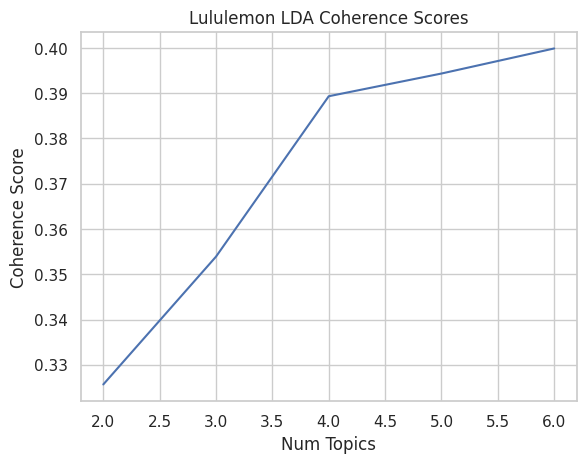

In [ ]:
lululemon_models, lululemon_scores = compute_coherence_values(
    dictionary=lululemon_dict,
    corpus=lululemon_corpus,
    texts=lululemon_tokens,
    start=2,
    limit=6,
    step=1
)

# Plot
plt.plot(range(2, 7), lululemon_scores)
plt.xlabel("Num Topics")
plt.ylabel("Coherence Score")
plt.title("Lululemon LDA Coherence Scores")
plt.grid(True)
plt.show()


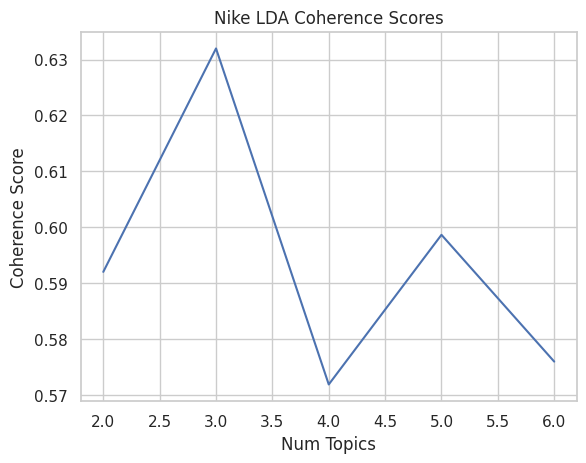

In [ ]:
nike_models, nike_scores = compute_coherence_values(
    dictionary=nike_dict,
    corpus=nike_corpus,
    texts=nike_tokens,
    start=2,
    limit=6,
    step=1
)

# Plot
plt.plot(range(2, 7), nike_scores)
plt.xlabel("Num Topics")
plt.ylabel("Coherence Score")
plt.title("Nike LDA Coherence Scores")
plt.grid(True)
plt.show()


## Topics Exploration

In [ ]:
# Assign dominant topic to each tweet from LDA output (Lululemon)
lululemon_topic_ids = [
    sorted(doc, key=lambda x: -x[1])[0][0] if doc else -1
    for doc in lululemon_lda[lululemon_corpus]
]
lululemon_df['topic'] = [
    f"Topic {i+1}" if i >= 0 else "None" for i in lululemon_topic_ids
]

# Assign dominant topic to each tweet from LDA output (Nike)
nike_topic_ids = [
    sorted(doc, key=lambda x: -x[1])[0][0] if doc else -1
    for doc in nike_lda[nike_corpus]
]
nike_df['topic'] = [
    f"Topic {i+1}" if i >= 0 else "None" for i in nike_topic_ids
]

# Final topic names based on keyword analysis and tweet inspection
lululemon_named_topics = [
    "Product & Customer Experience",
    "Sustainability and Ethical Topics",
    "Advocacy, Access & Brand Loyalty",
    "Wellness & Product Fit"
]

nike_named_topics = [
    "Sneaker & Brand Opinions",
    "Dunk Low Style & Hype",
    "Product Drops & Performance",
    "Sneaker Reviews & Promotions"
]

# Create mapping dictionaries
lululemon_topic_map = {f"Topic {i+1}": name for i, name in enumerate(lululemon_named_topics)}
nike_topic_map = {f"Topic {i+1}": name for i, name in enumerate(nike_named_topics)}

# Map human-readable topic labels to each tweet
lululemon_df['topic_label'] = lululemon_df['topic'].map(lululemon_topic_map)
nike_df['topic_label'] = nike_df['topic'].map(nike_topic_map)


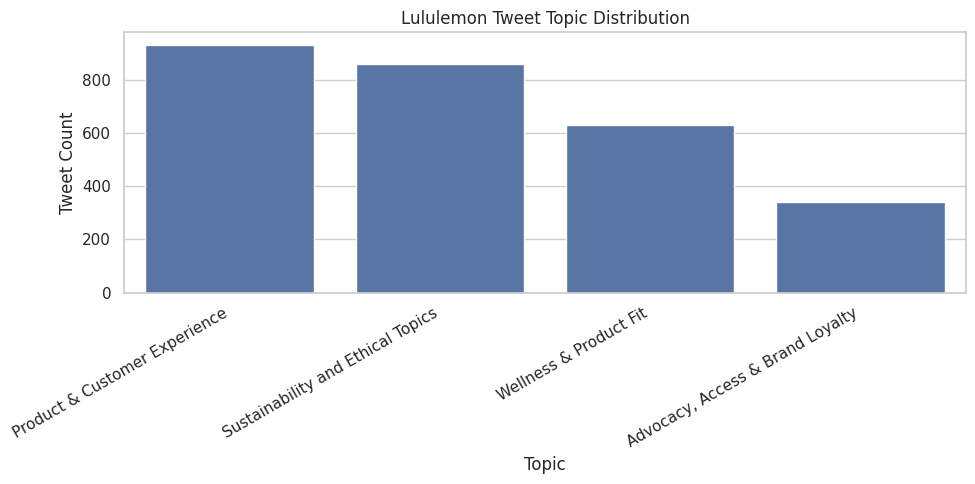

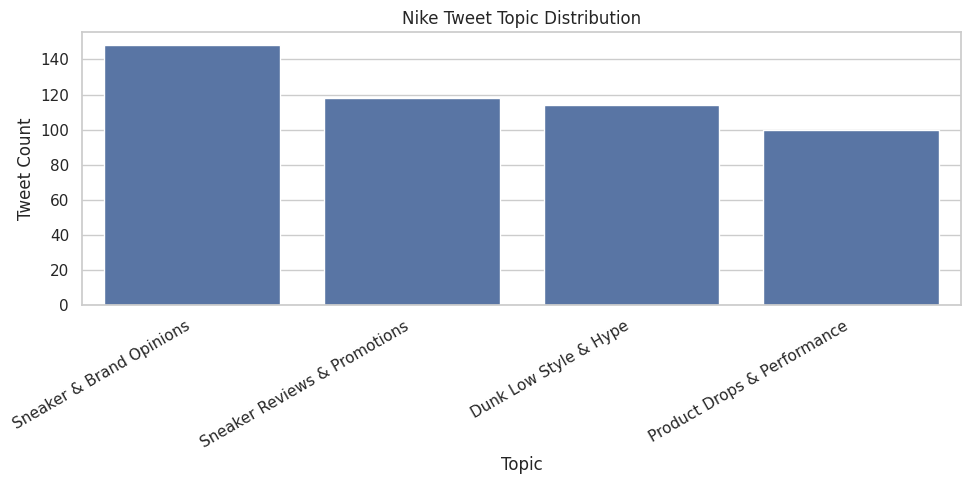

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lululemon topic distribution with readable labels
plt.figure(figsize=(10, 5))
sns.countplot(data=lululemon_df, x='topic_label', order=lululemon_df['topic_label'].value_counts().index)
plt.title("Lululemon Tweet Topic Distribution")
plt.xlabel("Topic")
plt.ylabel("Tweet Count")
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

# Nike topic distribution with readable labels
plt.figure(figsize=(10, 5))
sns.countplot(data=nike_df, x='topic_label', order=nike_df['topic_label'].value_counts().index)
plt.title("Nike Tweet Topic Distribution")
plt.xlabel("Topic")
plt.ylabel("Tweet Count")
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
def print_top_tweets_per_topic(df, corpus, lda_model, dictionary, topic_id, n=5):
    topic_tweets = []
    for i, bow in enumerate(corpus):
        topics = lda_model.get_document_topics(bow)
        if topics:
            dominant_topic = max(topics, key=lambda x: x[1])[0]
            if dominant_topic == topic_id:
                topic_tweets.append((df.iloc[i]['clean_text'], topics))
    print(f"\n--- Top {n} Tweets for Topic {topic_id + 1} ---")
    for tweet, _ in topic_tweets[:n]:
        print(f"- {tweet}")

# Example: Get top tweets for each topic in Lululemon
for i in range(4):
    print_top_tweets_per_topic(lululemon_df.reset_index(), lululemon_corpus, lululemon_lda, lululemon_dict, topic_id=i, n=5)



--- Top 5 Tweets for Topic 1 ---
- thank bill happy fridaylets close week strong great weekend
- hey placed order monday paid bucks priority shipping still havent seen stuff yall ok
- secured biggest gig life serving tacos new feel person event htx also shared wealth got good friends put drinks imma cry yall :flexedbicepsmediumskintone:
- thank bill happy friday wonderful weekend everyone
- try figure :womanshrugging: wish local store accessible try stuff legit crowded :guidedog: get stuck racks ask know best boi

--- Top 5 Tweets for Topic 2 ---
- thanks bill appreciate love mentioned awesome group:beamingfacewithsmilingeyes:
- buy sigh long day probs read :expressionlessface:
- mental picture :facewithtearsofjoy::grimacingface::loudlycryingface: order try return cannot person still app keep track youve purchased closet button find super helpful bc forget
- captively awaiting smoothie yesturday watched :heartonfire: momma god bless gathering things leave shop put schnauzer :dogface: 

In [ ]:
def print_top_tweets_per_topic(df, corpus, lda_model, dictionary, topic_id, n=5):
    topic_tweets = []
    for i, bow in enumerate(corpus):
        topics = lda_model.get_document_topics(bow)
        if topics:
            dominant_topic = max(topics, key=lambda x: x[1])[0]
            if dominant_topic == topic_id:
                topic_tweets.append((df.iloc[i]['clean_text'], topics))
    print(f"\n--- Top {n} Tweets for Topic {topic_id + 1} ---")
    for tweet, _ in topic_tweets[:n]:
        print(f"- {tweet}")

# Example: Get top tweets for each topic in nuke
for i in range(4):
      print_top_tweets_per_topic(nike_df.reset_index(), nike_corpus, nike_lda, nike_dict, topic_id=i, n=5)


--- Top 5 Tweets for Topic 1 ---
- cautiously optimistic early first look video got excited
- crazy find today nike sb aqua low size box
- air retro military black white
- boycott jerseys worst decision made almost bad jerseys ill never buy one made horribly
- wore joints received mad compliments dope af

--- Top 5 Tweets for Topic 2 ---
- x low premium special box
- nike dunk low super mario concept :mushroom:
- know meanstwo auto cards course :basketball:
- todays players better players era
- want welcome wg fl rebels family u eybl

--- Top 5 Tweets for Topic 3 ---
- early bird boys :eagle::eagle::eagle: reviews unreleased tiffany co x nike air force :ring:
- day row days successfully ran easy min recovery :mendingheart: run :personrunning: nike headspace crew thursday morning around neighborhood paths n parks
- nike ispa mindbody release tomorrow sizes: available online est first come first served basis click image info
- really need help arranging mountain bags closet dont even re

In [ ]:
# See rare tokens
token_counts = get_token_counts(lululemon_tokens)
print("Rare Lululemon tokens (appearing <3 times):")
print([token for token, count in token_counts.items() if count < 3])


Rare Lululemon tokens (appearing <3 times):
[]


In [ ]:
token_counts = get_token_counts(nike_tokens)
print("Rare Nike tokens (appearing <3 times):")
print([token for token, count in token_counts.items() if count < 3])

Rare Nike tokens (appearing <3 times):
[]


In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Extract topic word distributions
topic_terms = [dict(lululemon_lda.show_topic(i, topn=20)) for i in range(lululemon_lda.num_topics)]
topic_vectors = []
for topic in topic_terms:
    vector = np.array([topic.get(word, 0) for word in lululemon_lda.id2word.values()])
    topic_vectors.append(vector)

similarities = cosine_similarity(topic_vectors)
print(np.round(similarities, 2))


[[1.   0.19 0.04 0.02]
 [0.19 1.   0.09 0.03]
 [0.04 0.09 1.   0.  ]
 [0.02 0.03 0.   1.  ]]


In [ ]:
topic_terms = [dict(nike_lda.show_topic(i, topn=20)) for i in range(nike_lda.num_topics)]
topic_vectors = []
for topic in topic_terms:
    vector = np.array([topic.get(word, 0) for word in nike_lda.id2word.values()])
    topic_vectors.append(vector)

similarities = cosine_similarity(topic_vectors)
print(np.round(similarities, 2))

[[1.   0.07 0.13 0.08]
 [0.07 1.   0.08 0.38]
 [0.13 0.08 1.   0.  ]
 [0.08 0.38 0.   1.  ]]


In [ ]:
# Sample tweets by topic label for Lululemon
for label in sorted(lululemon_df['topic_label'].dropna().unique()):
    print(f"\n Sample tweets for {label} — Lululemon")
    topic_df = lululemon_df[lululemon_df['topic_label'] == label]
    sample_size = min(3, len(topic_df))
    sample = topic_df.sample(sample_size, random_state=42)
    display(sample[['text', 'clean_text']])

# Sample tweets by topic label for Nike
for label in sorted(nike_df['topic_label'].dropna().unique()):
    print(f"\n Sample tweets for {label} — Nike")
    topic_df = nike_df[nike_df['topic_label'] == label]
    sample_size = min(3, len(topic_df))
    sample = topic_df.sample(sample_size, random_state=42)
    display(sample[['text', 'clean_text']])



 Sample tweets for Advocacy, Access & Brand Loyalty — Lululemon


text  \
5779  This holiday season, youth wish @lululemon wou...   
3200  Was just talking to @annakatelyda about Christ...   
3115  @jonfortt @CNBCTechCheck @jonfortt @WarbyParke...   

                                             clean_text  
5779  holiday season youth wish would deliver climat...  
3200  talking christmas plans perusing website said ...  
3115  success investment stores makes perfect sense ...


 Sample tweets for Product & Customer Experience — Lululemon


text  \
2068  What is your favorite way to work up a sweat? ...   
436   @wgreen3 @Athleta @lululemon @VictoriasSecret ...   
1279  @lululemon why do physician assistants not get...   

                                             clean_text  
2068  favorite way work sweat thank healthy hudson p...  
436   :rollingonthefloorlaughing::rollingonthefloorl...  
1279  physician assistants get healthcare discount l...


 Sample tweets for Sustainability and Ethical Topics — Lululemon


text  \
4988  I think it's becoming a meme how long  @lulule...   
4336  @eWhispers @lululemon @Chewy @autozone @SAICin...   
763   Hey @lululemon,   You are so grateful that you...   

                                             clean_text  
4988  think becoming meme long ignorned questionscon...  
4336    favorite part waking saturday mornings thank ew  
763          hey grateful lower discount :thinkingface:


 Sample tweets for Wellness & Product Fit — Lululemon


text  \
5139  @mizjwolf @avatans @EWoodhouse7 @TSA @lululemo...   
2722                @lululemon got some fire face masks   
5586  Just got three new @lululemon masks for 2022. ...   

                                             clean_text  
5139  administrative agancies often delegated rule m...  
2722                                got fire face masks  
5586  got three new masks highly recommended :facewi...


 Sample tweets for Dunk Low Style & Hype — Nike


text  \
2216  FIRST LOOK IN HAND Nike Dunk Low Clot x Fragme...   
79    I want to Welcome 6’8 2024 WG @liammcneeley30 ...   
1309  What are you waiting for, if you're a Nike fan...   

                                             clean_text  
2216  first look hand nike dunk low clot x fragment ...  
79              want welcome wg fl rebels family u eybl  
1309  waiting youre nike fan get chance win gift car...


 Sample tweets for Product Drops & Performance — Nike


text  \
2511  Chapter 1, 1986.\nMy career was usurped by a w...   
1538  USA STORE ONLY:\n\nGold Standard 100% Whey Pro...   
2055  ARTEMIS is back! 🤗\n\nIt doesn’t even have to ...   

                                             clean_text  
2511  chapter career usurped widely respected narcis...  
1538  usa store only: gold standard whey protein powder  
2055  artemis back :: doesnt even kick ball already ...


 Sample tweets for Sneaker & Brand Opinions — Nike


text  \
2494  @CBSSports I love to watch him play, but I thi...   
1219  Today’s feets… comfy AM1’s. Love this colorway...   
2738  NIKE NOW OPEN!\n\nToday, Saturday and Sunday: ...   

                                             clean_text  
2494  love watch play think nd report ive seen indic...  
1219          todays feets comfy ams love colorway much  
2738  nike open today saturday sunday: get free cust...


 Sample tweets for Sneaker Reviews & Promotions — Nike


text  \
1337  @PeteHegseth did you know #Nike donated to #To...   
2204  Nike Airmax Furyosa Double Sole Sneaker\n\nSiz...   
132   #Nike Air 1 Daisy Athletic Sneakers Shoes 7Y\n...   

                                             clean_text  
1337  know donated defense fund havent bought nike p...  
2204  nike airmax furyosa double sole sneaker size: ...  
132      air daisy athletic sneakers shoes used find gt

In [ ]:
# Lululemon — Updated Topic Label Interpretation
high_impact_lulu = {
    'Product & Customer Experience': 'Community Appreciation & Relationship-Oriented Loyalty',
    'Sustainability and Ethical Topics': 'Service Frustrations & Retail Access',
    'Advocacy, Access & Brand Loyalty': 'Cause-Driven Engagement & Supportive Identity',
    'Wellness & Product Fit': 'Holistic Brand Values & Environmental Commitments'
}

# Nike — Updated Topic Label Interpretation
high_impact_nike = {
    'Sneaker & Brand Opinions': 'Brand Visibility, Drop Reactions & Cultural Commentary',
    'Dunk Low Style & Hype': 'Style Hype, Collectibles & Peer Validation',
    'Product Drops & Performance': 'Release Excitement & Fitness Focused Expression',
    'Sneaker Reviews & Promotions': 'Product Opinions & Aesthetic Fit in Daily Life'
}

# Function for summarizing impact by sentiment and emotion
def summarize_impact_with_sentiment_emotion(df, topic_col, brand_name, mapping):
    print(f"\n High-Impact Topic Breakdown for {brand_name}")

    for topic_label, theme in mapping.items():
        subset = df[df[topic_col] == topic_label]
        count = len(subset)

        # Sentiment breakdown
        sentiment_counts = subset['final_sentiment_label'].value_counts(normalize=True).mul(100).round(1).to_dict()
        dominant_sentiment = max(sentiment_counts, key=sentiment_counts.get) if sentiment_counts else "N/A"

        # Emotion breakdown
        if 'roberta_emotion' in subset.columns:
            emotion_counts = subset['roberta_emotion'].value_counts(normalize=True).mul(100).round(1).to_dict()
            dominant_emotion = max(emotion_counts, key=emotion_counts.get) if emotion_counts else "N/A"
        else:
            emotion_counts = {}
            dominant_emotion = "N/A"

        # Display summary
        print(f"\n **{theme}**  \n*({topic_label})*")
        print(f"- Tweet Count: {count}")
        print(f"- Sentiment Breakdown: {sentiment_counts}")
        print(f"- Dominant Sentiment: {dominant_sentiment}")
        print(f"- Dominant Emotion: {dominant_emotion}")

        # Sample tweet
        print("- Sample Tweet:")
        sample = subset['clean_text'].sample(1, random_state=42).values[0] if count > 0 else " No tweets found."
        print(f"  {sample}")


In [ ]:
summarize_impact_with_sentiment_emotion(
    lululemon_df,
    topic_col='topic_label',
    brand_name='Lululemon',
    mapping=high_impact_lulu
)

summarize_impact_with_sentiment_emotion(
    nike_df,
    topic_col='topic_label',
    brand_name='Nike',
    mapping=high_impact_nike
)



 High-Impact Topic Breakdown for Lululemon

 **Community Appreciation & Relationship-Oriented Loyalty**  
*(Product & Customer Experience)*
- Tweet Count: 934
- Sentiment Breakdown: {'positive': 42.8, 'negative': 29.6, 'neutral': 27.6}
- Dominant Sentiment: positive
- Dominant Emotion: optimism
- Sample Tweet:
  favorite way work sweat thank healthy hudson presenting sponsor powering another season free workouts visit website register final class season taking place today pier

 **Service Frustrations & Retail Access**  
*(Sustainability and Ethical Topics)*
- Tweet Count: 862
- Sentiment Breakdown: {'positive': 39.6, 'neutral': 34.8, 'negative': 25.6}
- Dominant Sentiment: positive
- Dominant Emotion: joy
- Sample Tweet:
  think becoming meme long ignorned questionsconcerns customer service another level long go

 **Cause-Driven Engagement & Supportive Identity**  
*(Advocacy, Access & Brand Loyalty)*
- Tweet Count: 342
- Sentiment Breakdown: {'negative': 50.3, 'positive': 37.1, 'neu

##Emotion VS Topic

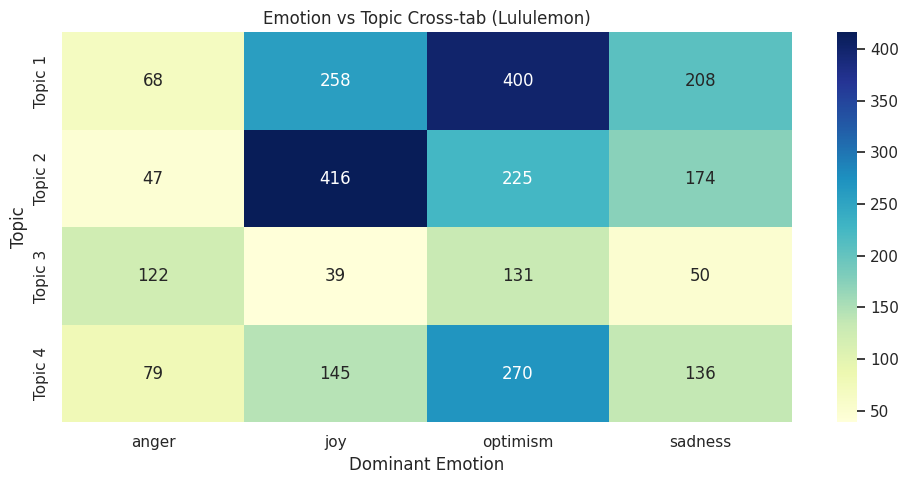

In [ ]:
# Build crosstab
emotion_topic_crosstab = pd.crosstab(lululemon_df['topic'], lululemon_df['roberta_emotion'])

# Plot heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(emotion_topic_crosstab, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Emotion vs Topic Cross-tab (Lululemon)")
plt.xlabel("Dominant Emotion")
plt.ylabel("Topic")
plt.tight_layout()
plt.show()


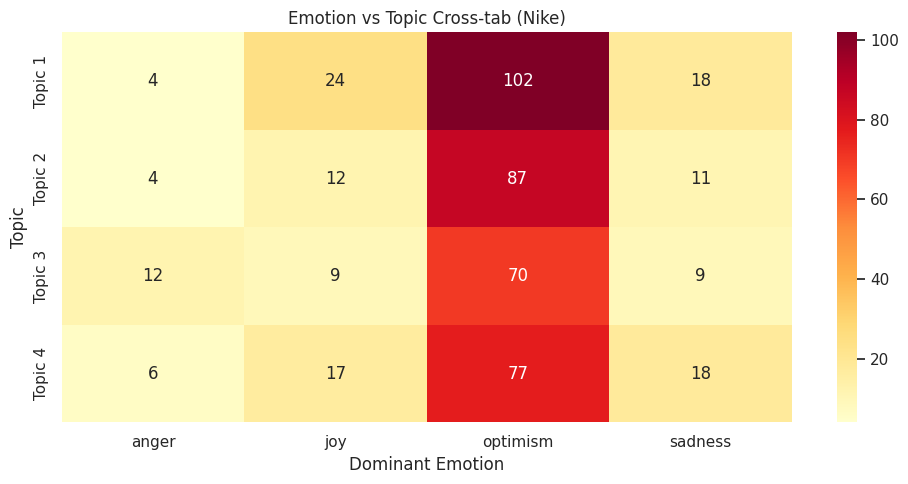

In [ ]:
emotion_topic_crosstab_nike = pd.crosstab(nike_df['topic'], nike_df['roberta_emotion'])

plt.figure(figsize=(10, 5))
sns.heatmap(emotion_topic_crosstab_nike, annot=True, fmt='d', cmap='YlOrRd')
plt.title("Emotion vs Topic Cross-tab (Nike)")
plt.xlabel("Dominant Emotion")
plt.ylabel("Topic")
plt.tight_layout()
plt.show()


##Sentiment VS Topic

In [ ]:
import pandas as pd

# Get dominant topic for each document
def get_dominant_topic(lda_model, corpus):
    dominant_topics = []
    for doc_bow in corpus:
        topic_probs = lda_model.get_document_topics(doc_bow, minimum_probability=0.0)
        dominant_topic = max(topic_probs, key=lambda x: x[1])[0]
        dominant_topics.append(dominant_topic)
    return dominant_topics

# Apply to each brand
lululemon_df['topic'] = get_dominant_topic(lululemon_lda, lululemon_corpus)
nike_df['topic'] = get_dominant_topic(nike_lda, nike_corpus)


In [ ]:
# Group and count
lululemon_topic_sentiment = lululemon_df.groupby(['topic', 'final_sentiment_label']).size().unstack(fill_value=0)
lululemon_topic_emotion = lululemon_df.groupby(['topic', 'roberta_emotion']).size().unstack(fill_value=0)

nike_topic_sentiment = nike_df.groupby(['topic', 'final_sentiment_label']).size().unstack(fill_value=0)
nike_topic_emotion = nike_df.groupby(['topic', 'roberta_emotion']).size().unstack(fill_value=0)

# Show as % distribution
lululemon_topic_sentiment_pct = lululemon_topic_sentiment.div(lululemon_topic_sentiment.sum(axis=1), axis=0).round(2)
nike_topic_sentiment_pct = nike_topic_sentiment.div(nike_topic_sentiment.sum(axis=1), axis=0).round(2)

# Engagement per topic
lululemon_topic_engagement = lululemon_df.groupby('topic')['engagement'].mean().round(2)
nike_topic_engagement = nike_df.groupby('topic')['engagement'].mean().round(2)


In [ ]:
from IPython.display import display

print("🔍 Lululemon - Topic vs Sentiment Distribution:")
display(lululemon_topic_sentiment_pct)

print("📈 Lululemon - Avg Engagement by Topic:")
display(lululemon_topic_engagement)

print("🔍 Nike - Topic vs Sentiment Distribution:")
display(nike_topic_sentiment_pct)

print("📈 Nike - Avg Engagement by Topic:")
display(nike_topic_engagement)


🔍 Lululemon - Topic vs Sentiment Distribution:


final_sentiment_label  negative  neutral  positive
topic                                             
0                          0.30     0.28      0.43
1                          0.26     0.35      0.40
2                          0.50     0.13      0.37
3                          0.34     0.26      0.40

📈 Lululemon - Avg Engagement by Topic:


topic
0    4.89
1    3.44
2    4.92
3    2.23
Name: engagement, dtype: float64

🔍 Nike - Topic vs Sentiment Distribution:


final_sentiment_label  negative  neutral  positive
topic                                             
0                          0.15     0.34      0.51
1                          0.13     0.37      0.50
2                          0.21     0.46      0.34
3                          0.20     0.40      0.40

📈 Nike - Avg Engagement by Topic:


topic
0     5.41
1     7.97
2     2.69
3    14.28
Name: engagement, dtype: float64